## Modules

In [3]:
import pandas as pd
import numpy as np
import config
import os
from dotenv import load_dotenv
load_dotenv()

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

from eda import show_categorical_summary, clean_dataframe, map_region, map_region_list

## Data import

In [4]:
historical_rfps_path = os.path.join(config.DATA_PATH_RAW, 'historical_rfps.csv')
lender_preferences_path = os.path.join(config.DATA_PATH_RAW, 'lender_preferences.csv')

df_raw_historical_rfps = pd.read_csv(historical_rfps_path)
df_raw_lender_preferences = pd.read_csv(lender_preferences_path)

## Data Exploration

### Data Gist

rfp data

In [5]:
display(df_raw_historical_rfps.head())
display(df_raw_historical_rfps.info())


,rfp_id,rfp_title,rfp_description,company_name,company_stage,company_founding_year,company_revenue_last_fy_usd,deal_size_usd,industry_sector,region,loan_type_requested,purpose_of_funds,submission_date,awarded_lender_id,funding_date,actual_funded_amount_usd,deal_status,number_of_applications_received,feedback_from_lender
0,RFP00001,Venture Debt for Seed Aerospace & Defense: Tor...,Seeking Venture Debt for Torres-Lee (Seed). Th...,Torres-Lee,Seed,2014.0,630923.0,35131801.0,Aerospace & Defense,North America,Venture Debt,Working Capital,2022-05-01,LDR0078,2022-06-25,32197086.0,Funded,11,NaN
1,RFP00002,Seed Round for Pre-Seed Media & Entertainment:...,"Seeking Seed Round for Hensley, Jimenez and Mi...","Hensley, Jimenez and Miller",Pre-Seed,1996.0,NaN,589842.0,Media & Entertainment,North America,Seed Round,Hiring Key Talent,2024-04-06,LDR0103,2024-08-13,476137.0,Funded,8,NaN
2,RFP00003,Revolving Credit Facility for Pre-Seed Educati...,Seeking Revolving Credit Facility for Henson L...,Henson Ltd,Pre-Seed,2015.0,704754.0,568035.0,Education,Western Europe,Revolving Credit Facility,Expansion (Domestic),2021-08-04,LDR0033,2021-10-03,466404.0,Funded,7,NaN
3,RFP00004,Project Finance for Startup Professional Servi...,"Seeking Project Finance for King, Hill and Mye...","King, Hill and Myers",Startup,2002.0,NaN,1452068.0,Professional Services,South Asia,Project Finance,Research and Development (R&D),2021-11-20,LDR0119,2022-01-28,1266622.0,Funded,12,NaN
4,RFP00005,Growth Equity for Startup Cybersecurity: Black...,Seeking Growth Equity for Blackwell-Mitchell (...,Blackwell-Mitchell,Startup,2022.0,21971354.0,1029195.0,Cybersecurity,North America,Growth Equity,Debt Refinancing,2022-08-28,LDR0114,2022-11-13,932076.0,Funded,11,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   rfp_id                           20000 non-null  object 
 1   rfp_title                        20000 non-null  object 
 2   rfp_description                  20000 non-null  object 
 3   company_name                     20000 non-null  object 
 4   company_stage                    20000 non-null  object 
 5   company_founding_year            16948 non-null  float64
 6   company_revenue_last_fy_usd      12744 non-null  float64
 7   deal_size_usd                    16948 non-null  float64
 8   industry_sector                  16948 non-null  object 
 9   region                           16948 non-null  object 
 10  loan_type_requested              16948 non-null  object 
 11  purpose_of_funds                 16948 non-null  object 
 12  submission_date   

None

lenders data

In [6]:
display(df_raw_lender_preferences.head())
display(df_raw_lender_preferences.info())


,lender_id,lender_name,lender_type,preferred_deal_size_min_usd,preferred_deal_size_max_usd,preferred_industries,preferred_regions,preferred_loan_types,risk_appetite,specialization_notes,avg_funding_timeline_days,indicative_interest_rate_min_pct,indicative_interest_rate_max_pct,historical_success_rate_pct,contact_person,contact_email,website
0,LDR0001,"Jenkins, Jordan and Sutton Trust",Venture Capital,500000,2542187,Retail; Consumer Goods; Media & Entertainment,UK & Ireland,Growth Equity; Term Loan (Secured); Invoice Fi...,Medium-High,Specializes as a venture capital. Primary indu...,51,6.13,9.59,35.0,Brandon Finley,jshepherd@ramos-johnson.net,https://wilkinson.biz/
1,LDR0002,Parker PLC,Private Equity,25000000,94421436,HealthTech; AI & Machine Learning; Deep Tech,Sub-Saharan Africa; East Asia,Strategic Investment,Opportunistic,Specializes as a private equity. Primary indus...,51,NaN,NaN,26.0,Andrea Brown,mjohnson@roberts.com,https://www.jacobson.biz/
2,LDR0003,Tapia-Johnson Partners,Specialty Finance Company,500000,2728239,Deep Tech,APAC (Asia-Pacific),Series C+,Opportunistic,Specializes as a specialty finance company. Pr...,112,NaN,NaN,33.0,Kyle Trujillo,uwright@rojas.net,https://www.ward.net/
3,LDR0004,Williams-Chan Investments,Credit Union,50000,268667,Healthcare,LATAM (Latin America),Growth Equity; Convertible Note; Series C+,Medium,Specializes as a credit union. Primary industr...,142,NaN,NaN,70.0,Diana Terry,qpruitt@brown.com,http://coleman.com/
4,LDR0005,"Harrell, Hoffman and Carpenter",Credit Union,100000,670147,Agriculture & AgTech,Sub-Saharan Africa; South Asia,Project Finance,Low,Specializes as a credit union. Primary industr...,111,NaN,NaN,49.0,Dr. Martha Rice,christopherhurst@calhoun-ashley.com,http://torres.info/


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   lender_id                         200 non-null    object 
 1   lender_name                       200 non-null    object 
 2   lender_type                       200 non-null    object 
 3   preferred_deal_size_min_usd       200 non-null    int64  
 4   preferred_deal_size_max_usd       200 non-null    int64  
 5   preferred_industries              200 non-null    object 
 6   preferred_regions                 200 non-null    object 
 7   preferred_loan_types              200 non-null    object 
 8   risk_appetite                     200 non-null    object 
 9   specialization_notes              200 non-null    object 
 10  avg_funding_timeline_days         200 non-null    int64  
 11  indicative_interest_rate_min_pct  143 non-null    float64
 12  indicati

None

### Data cleaning

rfps data

In [7]:
string_cols = [
    'rfp_id', 'rfp_title', 'rfp_description', 'company_name',
    'company_stage', 'industry_sector', 'region', 'loan_type_requested',
    'purpose_of_funds', 'awarded_lender_id', 'deal_status', 'feedback_from_lender'
]

numeric_cols = [
    'company_founding_year', 'company_revenue_last_fy_usd', 'deal_size_usd',
    'actual_funded_amount_usd', 'number_of_applications_received'
]

date_cols = [
    'submission_date', 'funding_date'
]

df_cleaned_historical_rfps = clean_dataframe(df_raw_historical_rfps,
                                         string_cols=string_cols)


print('=== Column Mapping ===')
print('Number of regions (Before): ', df_cleaned_historical_rfps['region'].nunique())
print('Regions (Before): ', df_cleaned_historical_rfps['region'].unique())
df_cleaned_historical_rfps['region'] = df_cleaned_historical_rfps['region'].apply(lambda x: map_region(x, hierarchy=config.REGIONAL_HIERARCHY))
print('Number of regions (After): ', df_cleaned_historical_rfps['region'].nunique())
print('Regions (After): ', df_cleaned_historical_rfps['region'].unique())

# Format types
df_cleaned_historical_rfps[date_cols] = df_cleaned_historical_rfps[date_cols].apply(pd.to_datetime, errors='coerce')
# df_cleaned_historical_rfps['company_founding_year'] = df_cleaned_historical_rfps['company_founding_year'].astype('Int64')

# Remove unnecessary columns (For now (Due time and complexity))
print('=== Columns excluded of analysis and data prep ===')
columns_to_drop = ['rfp_title', 'rfp_description', 'company_name', 'feedback_from_lender']
print(columns_to_drop)
df_cleaned_historical_rfps = df_cleaned_historical_rfps.drop(
    columns=columns_to_drop)

# Save cleaned dataframe (Parquet to preserve datatype)
cleaned_rfp_file_path = os.path.join(config.DATA_PATH_WRANGLE, 'cleaned_historical_rfps.parquet')
df_cleaned_historical_rfps.to_parquet(cleaned_rfp_file_path)

=== DATA CLEANING SUMMARY ===
Duplicated rows removed: 0
Column transformations:


,column,changed_values,dtype_before,dtype_after
0,rfp_id,20000,object,object
1,rfp_title,20000,object,object
2,rfp_description,20000,object,object
3,company_name,20000,object,object
4,company_stage,20000,object,object
5,industry_sector,20000,object,object
6,region,20000,object,object
7,loan_type_requested,20000,object,object
8,purpose_of_funds,20000,object,object
9,awarded_lender_id,20000,object,object


=== Column Mapping ===
Number of regions (Before):  20
Regions (Before):  ['north america' 'western europe' 'south asia' 'uk & ireland' nan 'global'
 'australia/new zealand' 'eastern europe'
 'emea (europe, middle east, africa)' 'canada' 'east asia' 'usa - south'
 'apac (asia-pacific)' 'sub-saharan africa' 'nordics' 'southeast asia'
 'usa - midwest' 'usa - east coast' 'latam (latin america)'
 'usa - west coast' 'middle east & north africa (mena)']
Number of regions (After):  4
Regions (After):  ['global' 'emea (europe, middle east, africa)' 'apac (asia-pacific)' nan
 'north america']
=== Columns excluded of analysis and data prep ===
['rfp_title', 'rfp_description', 'company_name', 'feedback_from_lender']


lenders data

In [8]:
string_cols = [
    'lender_id', 'lender_name', 'lender_type', 'preferred_industries',
    'preferred_regions', 'preferred_loan_types', 'risk_appetite', 'specialization_notes',
    'contact_person', 'contact_email', 'website'
]

numeric_cols = [
    'preferred_deal_size_min_usd', 'preferred_deal_size_max_usd',
    'avg_funding_timeline_days', 'indicative_interest_rate_min_pct',
    'indicative_interest_rate_max_pct', 'historical_success_rate_pct'
]

df_cleaned_lender_preferences = clean_dataframe(df_raw_lender_preferences,
                                         string_cols=string_cols)

print('=== Column Mapping ===')
print('Number of preferred regions (Before): ', df_cleaned_lender_preferences['preferred_regions'].nunique())
df_cleaned_lender_preferences['preferred_regions'] = df_cleaned_lender_preferences['preferred_regions'].apply(
    lambda x: map_region_list(x, hierarchy=config.REGIONAL_HIERARCHY))
print('Number of preferred regions (After): ', df_cleaned_lender_preferences['preferred_regions'].nunique())
print(df_cleaned_lender_preferences['preferred_regions'].unique())

# Remove unnecessary columns (For now (Due time and complexity))
print('=== Columns excluded of analysis and data prep ===')
columns_to_drop = ['lender_name', 'specialization_notes', 'contact_person', 'contact_email', 'website',
             'avg_funding_timeline_days', 'indicative_interest_rate_min_pct','indicative_interest_rate_max_pct'] # Add if there is time left
print(columns_to_drop)
df_cleaned_lender_preferences = df_cleaned_lender_preferences.drop(
    columns=columns_to_drop)

# Save cleaned dataframe (Parquet to preserve datatype)
cleaned_lenders_file_path = os.path.join(config.DATA_PATH_WRANGLE, 'cleaned_lender_preferences.parquet')
df_cleaned_lender_preferences.to_parquet(cleaned_lenders_file_path)

=== DATA CLEANING SUMMARY ===
Duplicated rows removed: 0
Column transformations:


,column,changed_values,dtype_before,dtype_after
0,lender_id,200,object,object
1,lender_name,200,object,object
2,lender_type,200,object,object
3,preferred_industries,200,object,object
4,preferred_regions,200,object,object
5,preferred_loan_types,200,object,object
6,risk_appetite,200,object,object
7,specialization_notes,200,object,object
8,contact_person,200,object,object


=== Column Mapping ===
Number of preferred regions (Before):  67
Number of preferred regions (After):  8
['emea (europe, middle east, africa)'
 'apac (asia-pacific); emea (europe, middle east, africa)' 'global'
 'apac (asia-pacific)' 'north america; apac (asia-pacific)'
 'north america; emea (europe, middle east, africa)'
 'north america; apac (asia-pacific); emea (europe, middle east, africa)'
 'north america']
=== Columns excluded of analysis and data prep ===
['lender_name', 'specialization_notes', 'contact_person', 'contact_email', 'website', 'avg_funding_timeline_days', 'indicative_interest_rate_min_pct', 'indicative_interest_rate_max_pct']


### Data understanding / Hypotesis

#### RFPs Hypotesis

In [9]:
print('Before cleaning ----------------------')
show_categorical_summary(df_raw_historical_rfps, max_unique=30, show_categories_frequencies=False)
print('After cleaning ----------------------')
show_categorical_summary(df_cleaned_historical_rfps, max_unique=30, show_categories_frequencies=True)

Before cleaning ----------------------
=== CATEGORICAL COLUMN SUMMARY ===


,column,n_unique,nan_pct,main_cat,main_pct,minor_cat,minor_pct
0,company_stage,7,0.00,Seed,14.92,Pre-Seed,13.76
1,industry_sector,28,15.26,Automotive,4.80,EdTech,1.10
2,region,21,15.26,North America,18.86,LATAM (Latin America),1.57
3,loan_type_requested,21,15.26,Pre-Seed Funding,5.56,Line of Credit,1.70
4,purpose_of_funds,16,15.26,Acquisition of Competitor,6.02,Technology Infrastructure Upgrade,5.28
5,deal_status,9,0.00,Funded,70.19,Withdrawn by Applicant,1.92
6,number_of_applications_received,16,0.00,0,16.87,10,4.57


After cleaning ----------------------
=== CATEGORICAL COLUMN SUMMARY ===


,column,n_unique,nan_pct,main_cat,main_pct,minor_cat,minor_pct
0,company_stage,7,0.00,seed,14.92,pre-seed,13.76
1,industry_sector,28,15.26,automotive,4.80,edtech,1.10
2,region,5,15.26,global,39.32,north america,11.04
3,loan_type_requested,21,15.26,pre-seed funding,5.56,line of credit,1.70
4,purpose_of_funds,16,15.26,acquisition of competitor,6.02,technology infrastructure upgrade,5.28
5,deal_status,9,0.00,funded,70.19,withdrawn by applicant,1.92
6,number_of_applications_received,16,0.00,0,16.87,10,4.57



--- Column: company_stage ---
company_stage
seed            2984
startup         2887
early-stage     2886
mature          2865
late-stage      2842
growth-stage    2785
pre-seed        2751
Name: count, dtype: int64

--- Column: industry_sector ---
industry_sector
NaN                              3052
automotive                        959
gaming                            938
healthcare                        936
biotechnology                     935
real estate                       924
deep tech                         912
logistics & supply chain          899
education                         894
consumer goods                    851
technology                        843
aerospace & defense               808
cybersecurity                     807
professional services             766
construction & infrastructure     639
manufacturing                     631
renewable energy                  611
finance                           610
retail                            464
hospitality

In [10]:
funded_rfps = df_cleaned_historical_rfps[df_cleaned_historical_rfps['deal_status'] == 'funded']
not_funded_rfps = df_cleaned_historical_rfps[~(df_cleaned_historical_rfps['deal_status'] == 'funded')]

show_categorical_summary(funded_rfps, max_unique=30, show_categories_frequencies=False)
show_categorical_summary(not_funded_rfps, max_unique=30, show_categories_frequencies=False)

=== CATEGORICAL COLUMN SUMMARY ===


,column,n_unique,nan_pct,main_cat,main_pct,minor_cat,minor_pct
0,company_stage,7,0.0,seed,15.20,pre-seed,13.64
1,industry_sector,27,0.0,automotive,5.93,edtech,0.84
2,region,4,0.0,global,50.82,north america,10.44
3,loan_type_requested,20,0.0,pre-seed funding,6.97,sba loan,1.25
4,purpose_of_funds,15,0.0,acquisition of competitor,7.01,technology infrastructure upgrade,6.06
5,deal_status,1,0.0,funded,100.00,funded,100.00
6,number_of_applications_received,15,0.0,12,7.04,6,6.24


=== CATEGORICAL COLUMN SUMMARY ===


,column,n_unique,nan_pct,main_cat,main_pct,minor_cat,minor_pct
0,company_stage,7,0.0,late-stage,14.80,startup,13.94
1,industry_sector,28,51.2,hospitality & tourism,2.30,fintech,1.34
2,region,5,51.2,"emea (europe, middle east, africa)",14.09,apac (asia-pacific),10.02
3,loan_type_requested,21,51.2,term loan (secured),2.85,series c+,1.78
4,purpose_of_funds,16,51.2,acquisition of competitor,3.71,equipment purchase/upgrade,2.85
5,awarded_lender_id,1,100.0,None,0.00,None,0.00
6,funding_date,1,100.0,None,0.00,None,0.00
7,actual_funded_amount_usd,1,100.0,None,0.00,None,0.00
8,deal_status,8,0.0,draft,51.20,withdrawn by applicant,6.46
9,number_of_applications_received,9,0.0,0,56.60,3,4.58


Premises: Only funded RFPs will be considereed as the positive class!

Hypothesis
- HIP1: Probably, RFPs that have the industry_sector, region and loan_type_requested has more chance to be funded by a lender with this interest
- HIP2: The company stage doesn't seem to have a huge impact on an RFP being successfully funded
- HIP3: It seems that some companiessector has a better chance to be funded (ex: automotive vs hospitality & tourism)
- HIP4: The global region seems to have more chances to be funded then emea
- HIP5: loan_type_requested and purpose_of_funds has an impact opn successfulness but it doesn't seem to be really big
- HIP6: RFPs with more applications has a higher chance to be funded (I will not use as a metric of successfulness, but it can be used as a termometer)

#### Lenders Hypotesis

In [11]:
print('Before cleaning ----------------------')
show_categorical_summary(df_raw_lender_preferences, max_unique=100, show_categories_frequencies=False)
print('After cleaning ----------------------')
show_categorical_summary(df_cleaned_lender_preferences, max_unique=100, show_categories_frequencies=True)

Before cleaning ----------------------
=== CATEGORICAL COLUMN SUMMARY ===


,column,n_unique,nan_pct,main_cat,main_pct,minor_cat,minor_pct
0,lender_type,12,0.0,Mezzanine Fund,11.0,Specialty Finance Company,6.0
1,preferred_deal_size_min_usd,9,0.0,5000000,22.5,2000000,2.5
2,preferred_regions,67,0.0,APAC (Asia-Pacific),8.5,Sub-Saharan Africa; East Asia,0.5
3,risk_appetite,8,0.0,Medium,15.0,Medium-High,8.0
4,historical_success_rate_pct,64,0.0,63.0,4.0,53.0,0.5


After cleaning ----------------------
=== CATEGORICAL COLUMN SUMMARY ===


,column,n_unique,nan_pct,main_cat,main_pct,minor_cat,minor_pct
0,lender_type,12,0.0,mezzanine fund,11.0,specialty finance company,6.0
1,preferred_deal_size_min_usd,9,0.0,5000000,22.5,2000000,2.5
2,preferred_regions,8,0.0,global,70.5,north america; apac (asia-pacific); emea (euro...,1.0
3,risk_appetite,8,0.0,medium,15.0,medium-high,8.0
4,historical_success_rate_pct,64,0.0,63.0,4.0,53.0,0.5



--- Column: lender_type ---
lender_type
mezzanine fund                     22
credit union                       20
investment fund                    20
venture capital                    19
private equity                     18
commercial bank                    17
peer-to-peer lender                17
impact investor                    15
corporate venture capital          14
angel investor group               13
development finance institution    13
specialty finance company          12
Name: count, dtype: int64

--- Column: preferred_deal_size_min_usd ---
preferred_deal_size_min_usd
5000000     45
100000      44
1000000     30
500000      27
10000000    17
250000      15
50000       11
25000000     6
2000000      5
Name: count, dtype: int64

--- Column: preferred_regions ---
preferred_regions
global                                                                    141
emea (europe, middle east, africa)                                         14
north america; emea (europe, middl

Hypothesis
- HIP1: Probably, the lender prefered deal has a positive correlation with your success rate
- HIP2: Maybe preferable zones and industries has a higher correlation with success rate than others

## Data Analysis

In [12]:
from eda import (plot_stacked_company_stage_impact, plot_stacked_revenue_bins, plot_stacked_deal_size_bins,
                 plot_percentage_line_company_age_impact, plot_sorted_stacked_sector_impact,
                 plot_stacked_region_impact, plot_stacked_loan_type_impact,
                 plot_stacked_purpose_of_funds_impact, plot_stacked_applications_bins,
                 plot_lender_preference_matches, plot_combined_lender_preference_match,
                 plot_strike_zone_analysis, plot_bar_graph, plot_lender_deal_size_correlation_analysis)

df_cleaned_historical_rfps['funded_flag'] = df_cleaned_historical_rfps['deal_status'].apply(
    lambda x: 'was funded' if x == 'funded' else 'was not funded'
)

# Merge with lender preferences
df_analysis = pd.merge(
    df_cleaned_historical_rfps,
    df_cleaned_lender_preferences,
    left_on='awarded_lender_id',
    right_on='lender_id',
    how='left'
)

df_analysis_funded_rfps = df_analysis[df_analysis['deal_status'] == 'funded']
df_analysis_not_funded_rfps = df_analysis[~(df_analysis['deal_status'] == 'funded')]

#### Successfull RFPs - General analysis

##### Company stage

- Funding rates are consistent across all stages (69–72%)
- No stage significantly impacts funding success
- Not a strong predictor → can be deprioritized or excluded in models

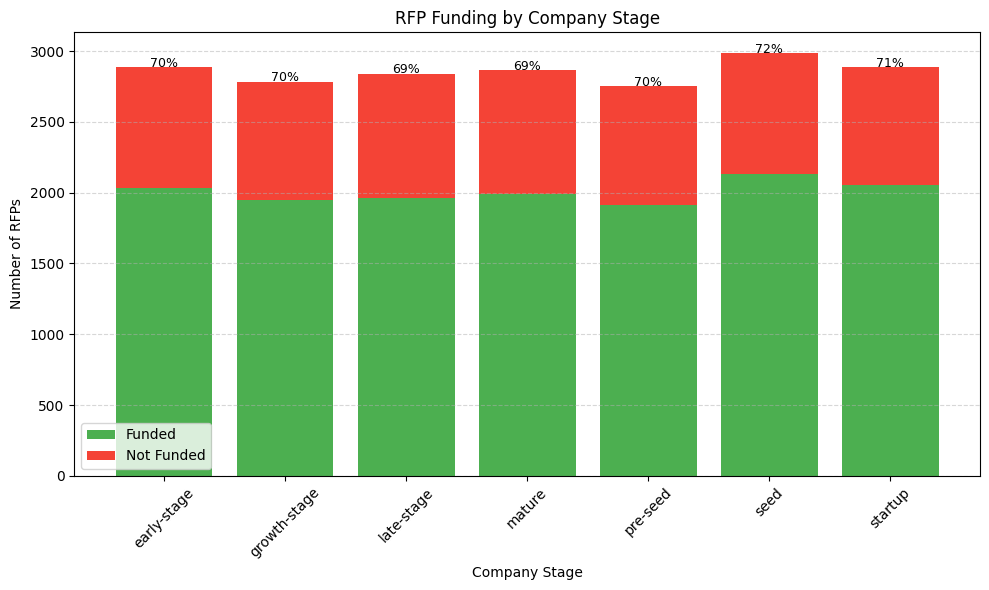

In [13]:
plot_stacked_company_stage_impact(df_analysis_funded_rfps, df_analysis_not_funded_rfps)

##### Revenue analysis

- Most RFPs come from companies earning < $12.5K/year
- Funding rates across revenue bins are consistently high (79–86%)
- Revenue alone has low predictive power for funding success

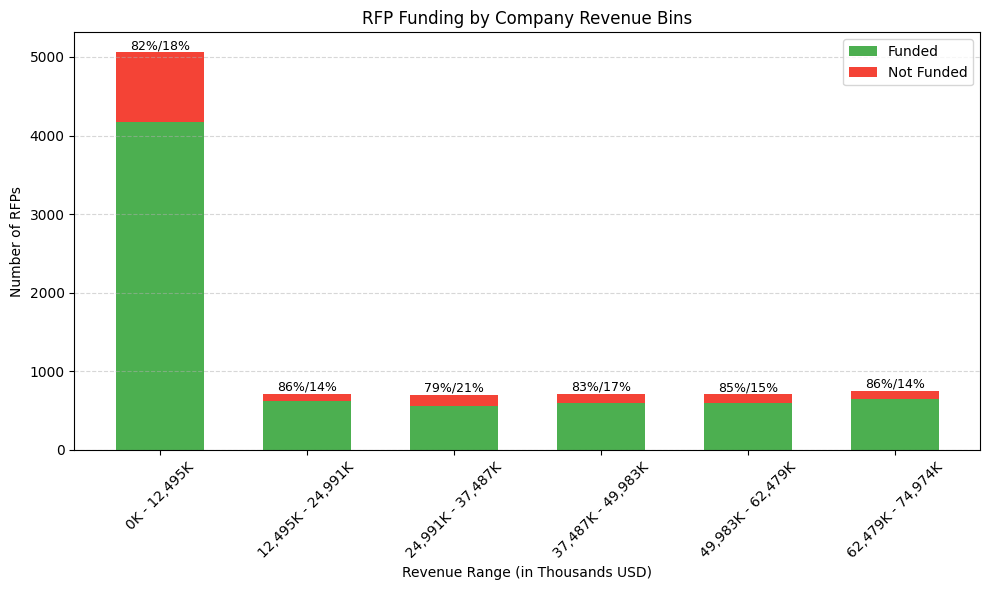

In [14]:
plot_stacked_revenue_bins(df_analysis_funded_rfps, df_analysis_not_funded_rfps, bins=6)


##### Deal size USD

- Smaller deals (< $40K) → High funding rates (76–95%)
- Mid-size deals ($40K–108K) → Drop to ~57–66%
- Very large deals (> $108K) → 100% funding observed
- Nonlinear effect → Useful predictive feature

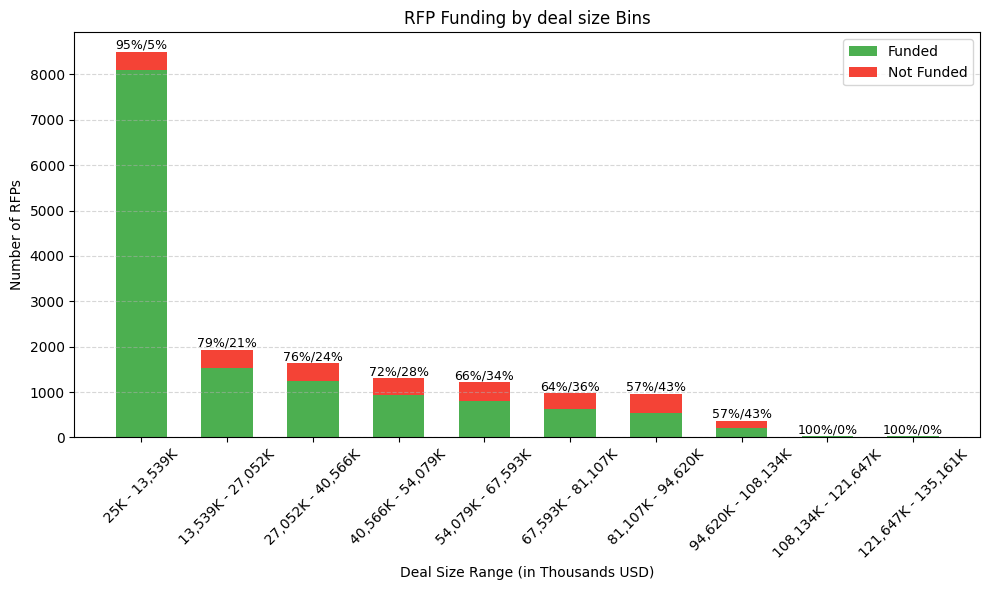

In [15]:
plot_stacked_deal_size_bins(df_analysis_funded_rfps, df_analysis_not_funded_rfps, bins=10)

##### Company age impact

- Funded and not funded RFPs show nearly identical age distribution
- No meaningful trends across maturity levels
- Low predictive value → can be deprioritized in models

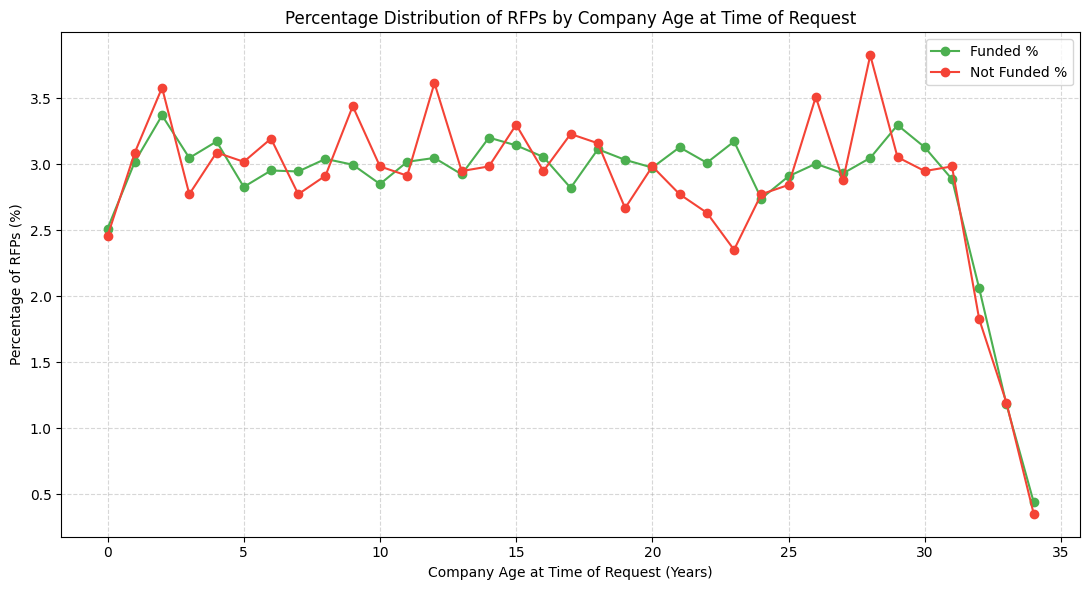

In [16]:
plot_percentage_line_company_age_impact(df_analysis_funded_rfps, df_analysis_not_funded_rfps, use_submission_date=True)

##### Industry sector impact

- High-impact feature — strong variation in funding rates
- Top sectors (e.g., logistics, education, healthcare) → >88%
- Bottom sectors (e.g., agtech, edtech, AI/ML) → ~50–55%
- Strong predictor

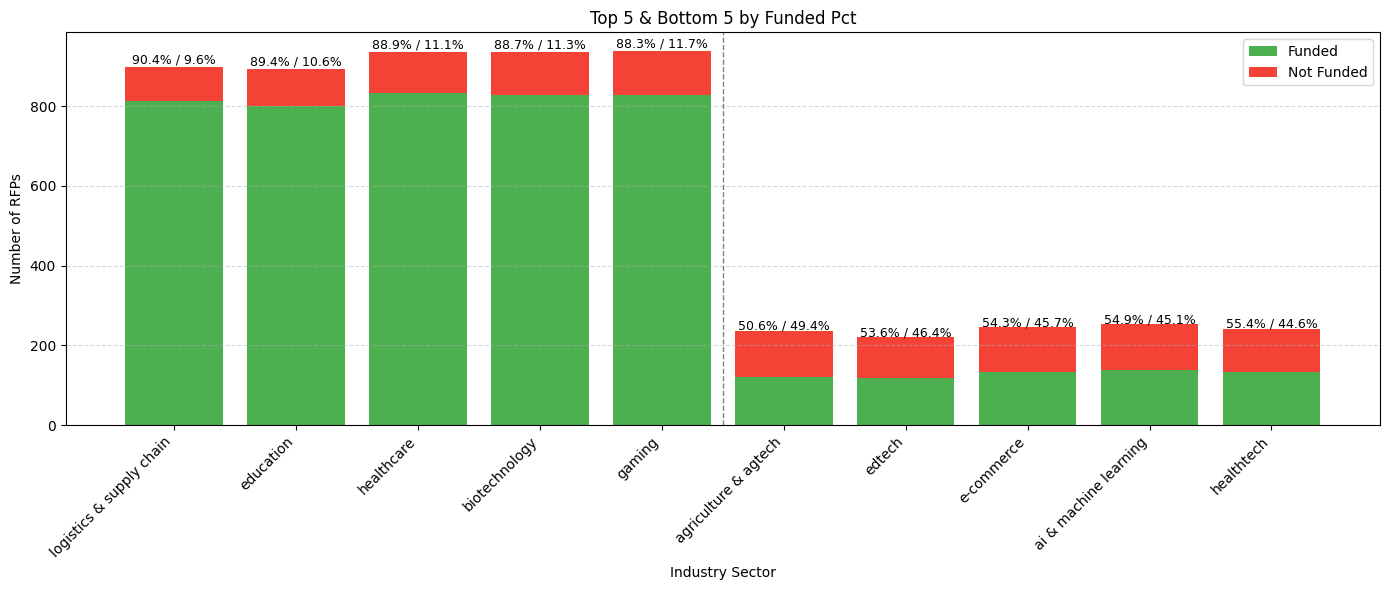

In [17]:
plot_sorted_stacked_sector_impact(
    df_analysis_funded_rfps,
    df_analysis_not_funded_rfps,
    top_n=5,
    bottom_n=5,
    sort_by='funded_pct'
)

# plot_sorted_stacked_sector_impact(
#     df_analysis_funded_rfps,
#     df_analysis_not_funded_rfps,
#     top_n=5,
#     bottom_n=5,
#     sort_by='funded'
# )

# plot_sorted_stacked_sector_impact(
#     df_analysis_funded_rfps,
#     df_analysis_not_funded_rfps,
#     top_n=5,
#     bottom_n=5,
#     sort_by='not_funded'
# )

##### Region impact

- Funding rates vary by region (e.g., Global: 91% vs North America: 66%)
- Intermediate: APAC (81%), EMEA (77%)
- Useful predictive feature for modeling funding outcomes

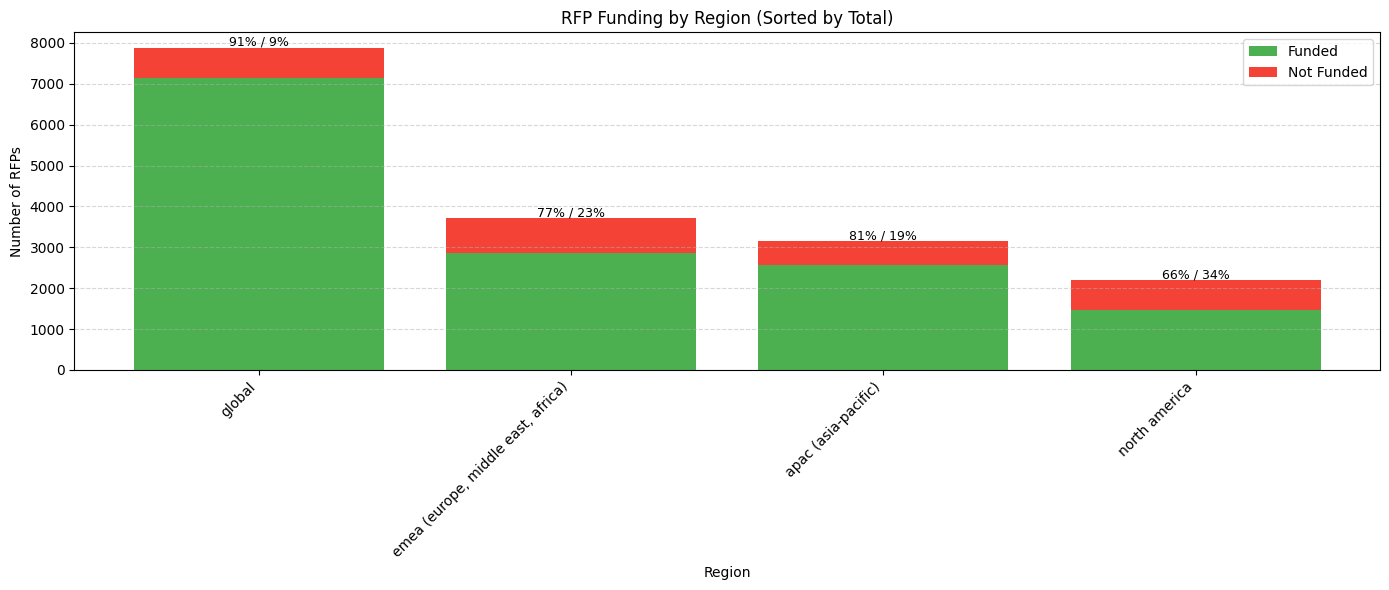

In [18]:
plot_stacked_region_impact(df_analysis_funded_rfps, df_analysis_not_funded_rfps)


##### Loan type request impact

- Most loan types have high funding rates (80–88%)
- SBA loans and lines of credit → much lower (52–56%)
- Reflects lender risk perception or policy
- Informative feature, especially for low-performing categories

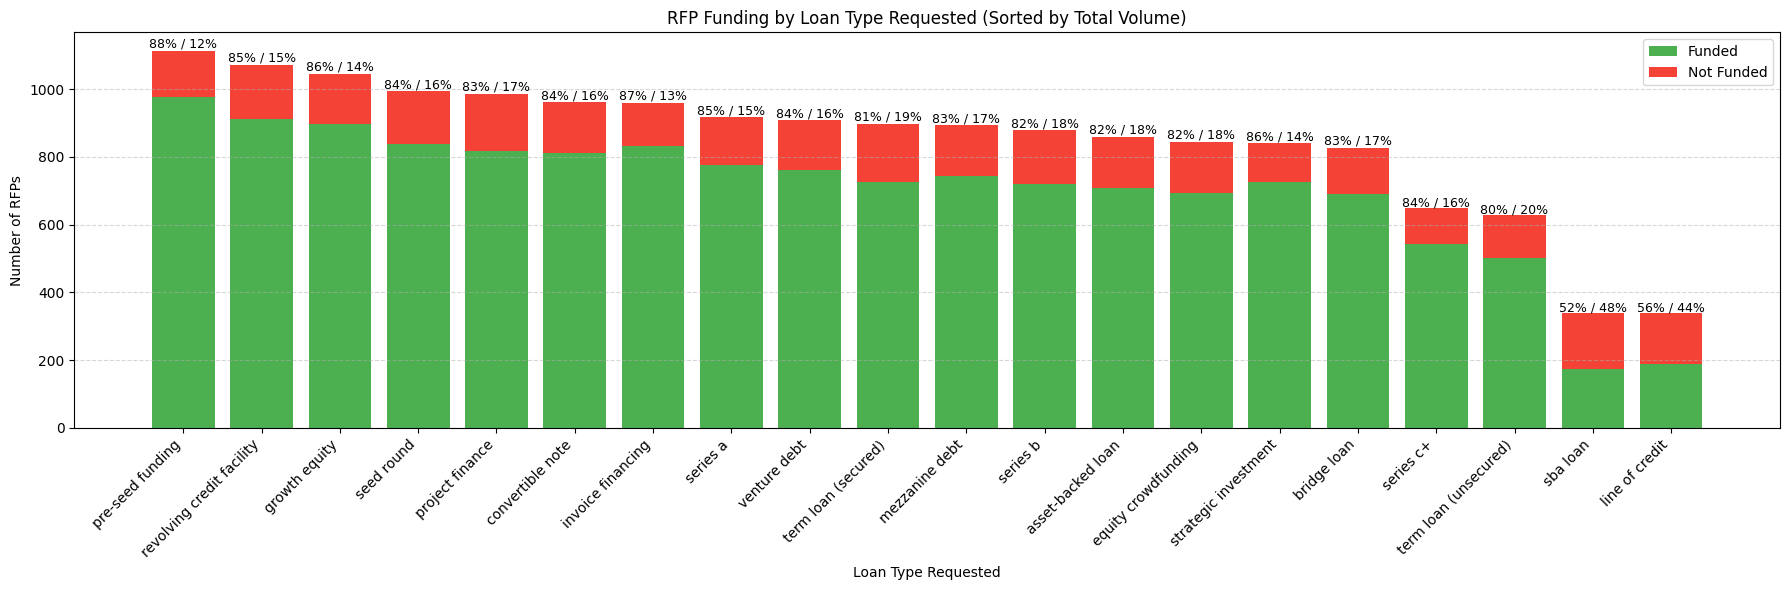

In [19]:
plot_stacked_loan_type_impact(df_analysis_funded_rfps, df_analysis_not_funded_rfps)


##### Purpose of funds impact

- Funding rates are uniform across categories (80–85%)
- No strong signal or variation by purpose
- Low predictive value — can be deprioritized in modeling

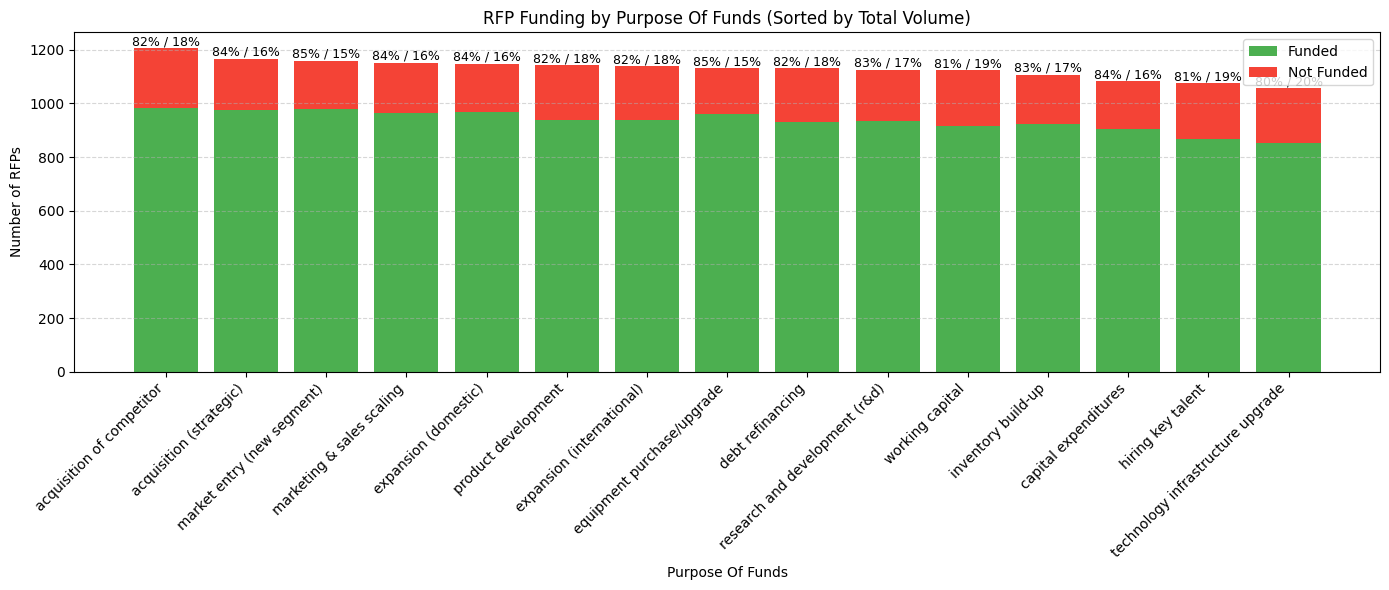

In [20]:
plot_stacked_purpose_of_funds_impact(df_analysis_funded_rfps, df_analysis_not_funded_rfps)

##### Number of applications termometer

- The chances of a rfp get funded increases with the number of applications recieved
- Even this beeing true, it is not a characteristic of the rfp, so will not be used as feature for similaraty
- Useful for post-analysis, but not a good predictive feature for similarity or early-stage modeling

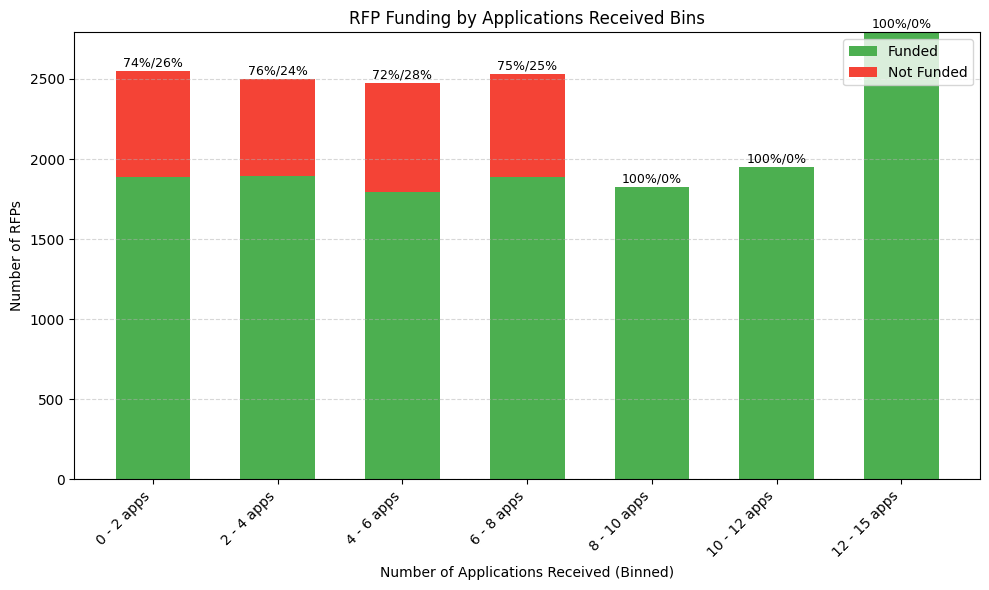

In [21]:
plot_stacked_applications_bins(df_analysis_funded_rfps, df_analysis_not_funded_rfps, bins=7)

#### Prefered lenders specifications

- Strong correlation: RFPs aligned with lender preferences (industry, region, or loan type) are much more likely to be funded.
- Funding rate jumps to 86% when any match exists, vs. just 14% when there's no match.
- This makes preference alignment a highly predictive feature and critical for both recommendation engines and funding outcome models.

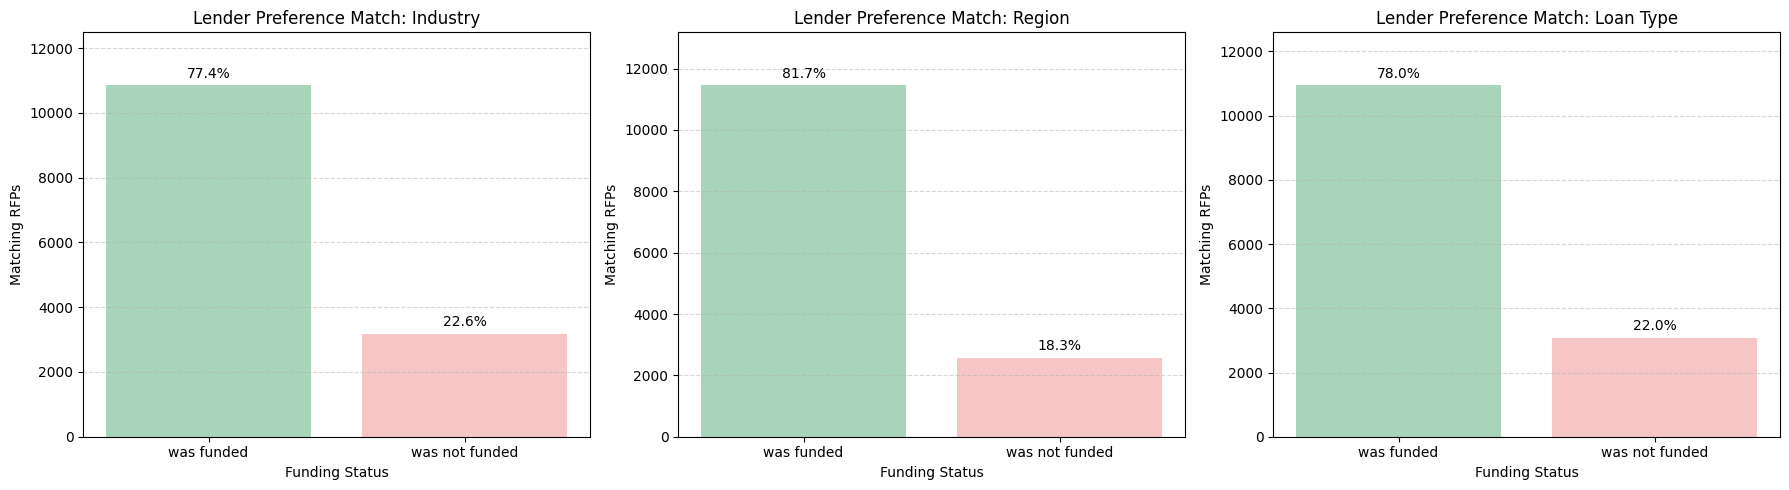

In [22]:
plot_lender_preference_matches(df_analysis)


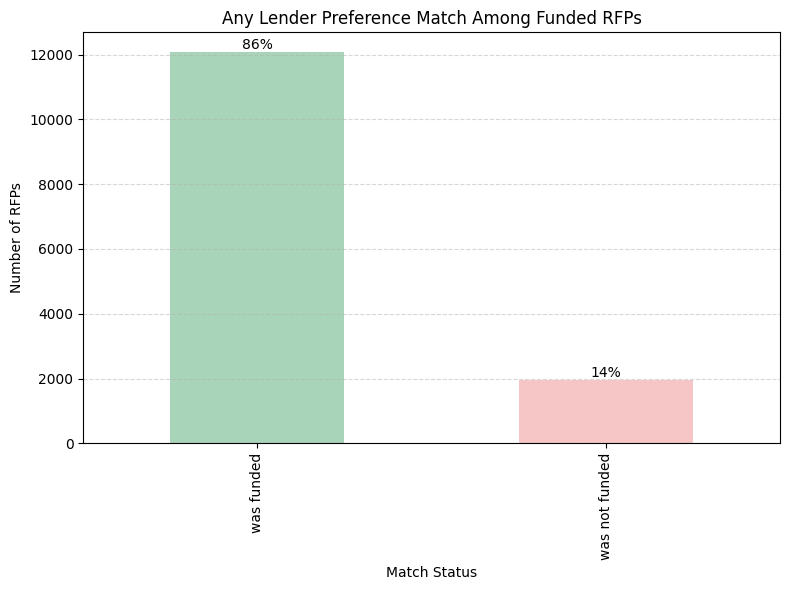

In [23]:
plot_combined_lender_preference_match(df_analysis)

- Strong correlation: RFPs with deal sizes within the lender’s preferred strike zone are significantly more common among funded cases.
    - 78.1% of requested and 75.6% of actual funded amounts fall within the preferred range, versus only ~22–24% falling outside.
- Deal size alignment with lender preferences is a strong predictor of funding success and should be included as a core feature in both recommendation systems and funding prediction models.

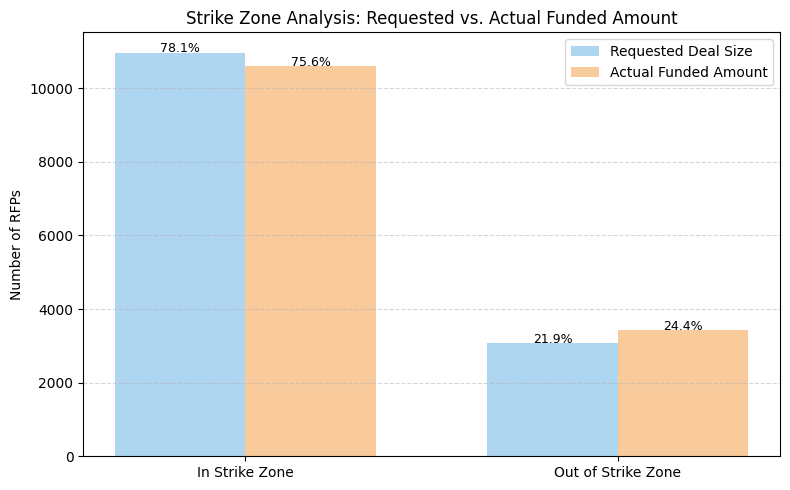

In [24]:
plot_strike_zone_analysis(df_analysis_funded_rfps)

#### Succesful Lenders profile

In [25]:
# I will consideer as active lender, only the ones that lend money to some rfp (all of them)
df_lender_analysis = df_cleaned_lender_preferences

##### Lenders type successful rate

- Top performers: Venture capital, corporate venture capital, and specialty finance companies show the highest median success rates, all around or just under 50–55%.
- Lower performers: Angel investor groups and development finance institutions appear at the bottom, with median success rates below 40%
- The chart reinforces that lender type is a meaningful characteristic in explaining historical success rates and should be considered when profiling effective lending strategies.

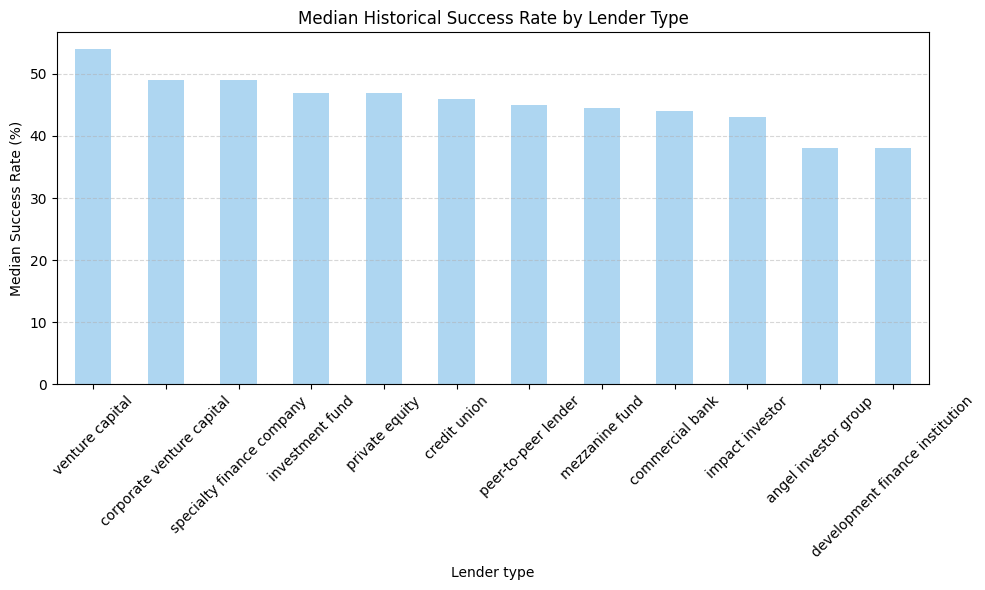

In [26]:
# Group and compute median
median_success = df_lender_analysis.groupby('lender_type')['historical_success_rate_pct'].median().sort_values(ascending=False)

plot_bar_graph(median_success, 
               title='Median Historical Success Rate by Lender Type', 
               column_name='lender_type')

##### Risk apetite impact

- High and medium-high risk appetite lenders have the highest median success rates (>50%), suggesting that balanced risk-taking yields stronger results.
- Conservative or cautious profiles (e.g., medium-low, medium) show lower medians (40–41%).
- This makes risk appetite a good predictor when profiling high-performing lenders.

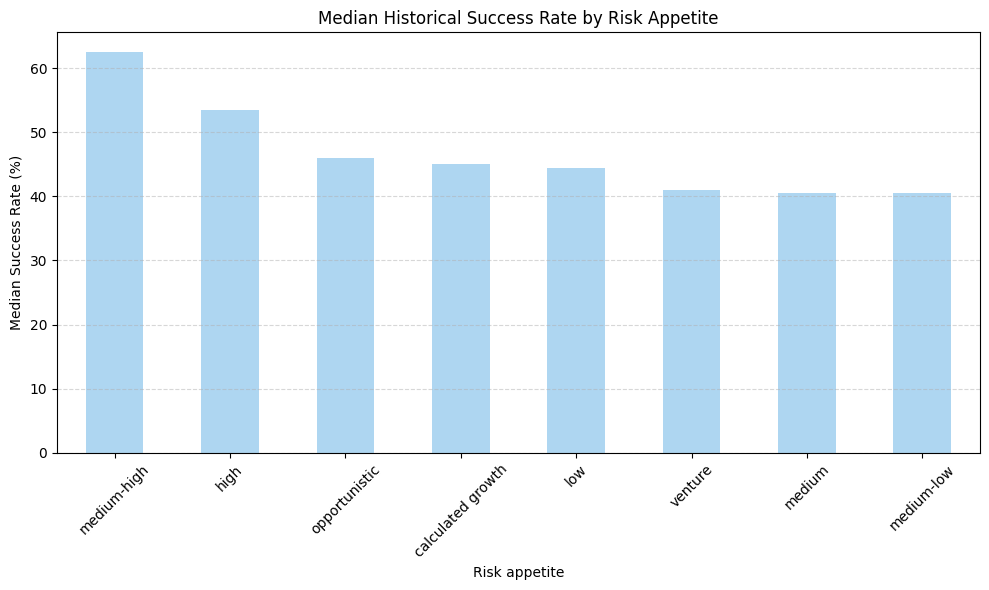

In [27]:
# Group and compute median
median_success = df_lender_analysis.groupby('risk_appetite')['historical_success_rate_pct'].median().sort_values(ascending=False)

plot_bar_graph(median_success, 
               title='Median Historical Success Rate by Risk Appetite', 
               column_name='risk_appetite')

##### Preferred range deal (min max)

- Correlation between deal size metrics (min, max, range) and success rate is negligible or slightly negative.
- Indicates deal size preferences don’t impact performance — high or low, wide or narrow, it doesn’t matter.
- This makes deal size a weak predictor of lender effectiveness, especially when compared to features like risk appetite or lender type.

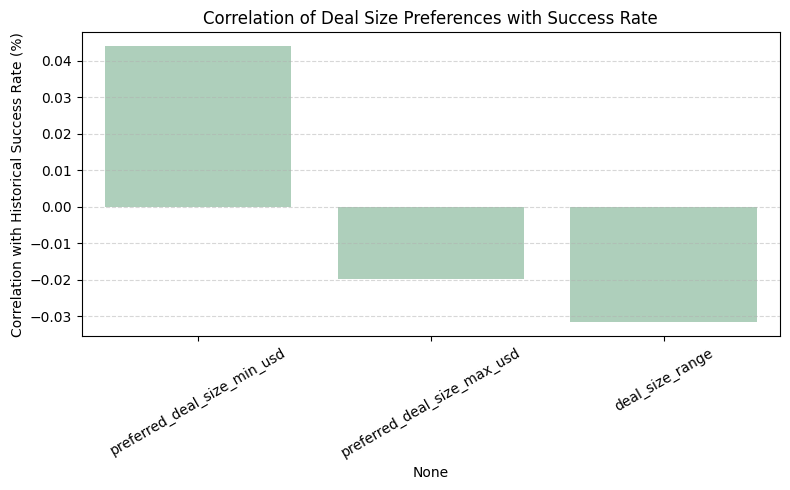

In [28]:
plot_lender_deal_size_correlation_analysis(df_lender_analysis)

##### Prefered region

- Lenders focused on APAC or North America have the highest median success rates, both above 50%.
- EMEA-focused lenders show lower success, especially in the bottom tier.
- Suggests that regional specialization — particularly in APAC and North America — correlates with stronger performance

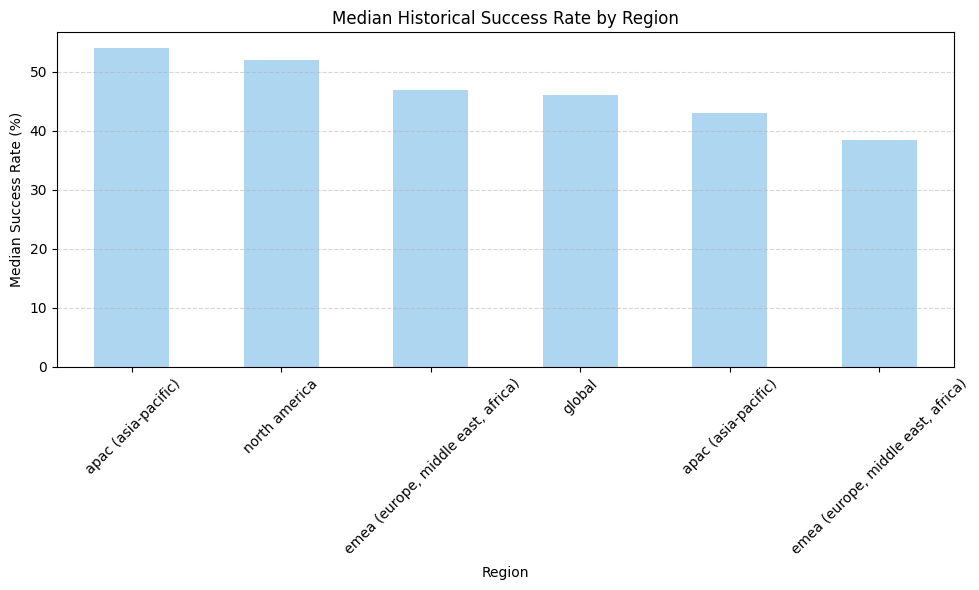

In [29]:
# Group and compute median
df_lender_analysis['preferred_region_list'] = df_lender_analysis['preferred_regions'].str.split(';')
exploded = df_lender_analysis.explode('preferred_region_list')
median_success = exploded.groupby('preferred_region_list')['historical_success_rate_pct'].median().sort_values(ascending=False)

plot_bar_graph(median_success, 
               title='Median Historical Success Rate by Region', 
               column_name='region')

##### Prefered industries

- Top-performing industries: Lenders focusing on SaaS, hospitality & tourism, and healthcare demonstrate the highest median success rates — all above 60%
- Lower-performing industries: Real estate, construction & infrastructure, and biotechnology show median success rates below 30%, indicating higher volatility or misalignment with lender expertise.
- Industry preference is a strong differentiator of lender success and should be considered in profiling.

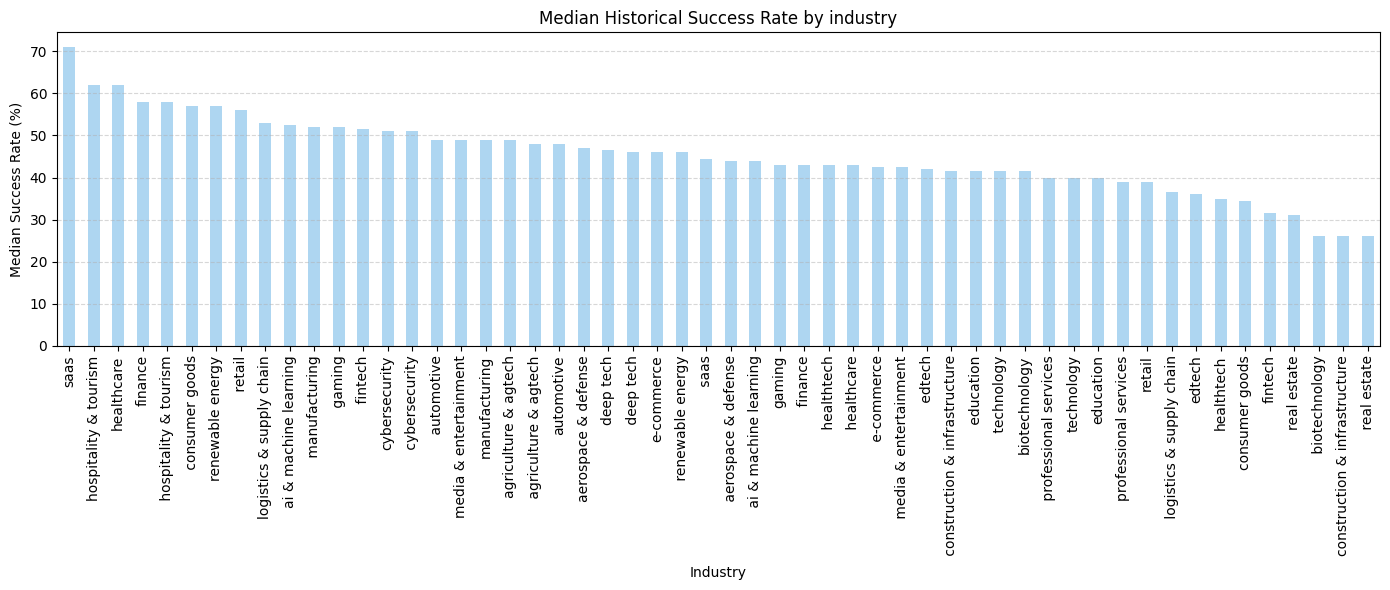

In [30]:
# Group and compute median
df_lender_analysis['preferred_industries_list'] = df_lender_analysis['preferred_industries'].str.split(';')
exploded = df_lender_analysis.explode('preferred_industries_list')
median_success = exploded.groupby('preferred_industries_list')['historical_success_rate_pct'].median().sort_values(ascending=False)

plot_bar_graph(median_success, 
               title='Median Historical Success Rate by industry', 
               column_name='industry',
               figsize=(14, 6),
               rotation=90)

##### Prefered Loan types

- Top-performing loan types: Lenders specializing in secured term loans, venture debt, and invoice financing achieve the highest median success rates
- Lower-performing loan types: Equity crowdfunding, Series C+, and asset-backed loans rank at the bottom, with median success rates under 40%
- Loan type specialization is a strong indicator of lender performance.

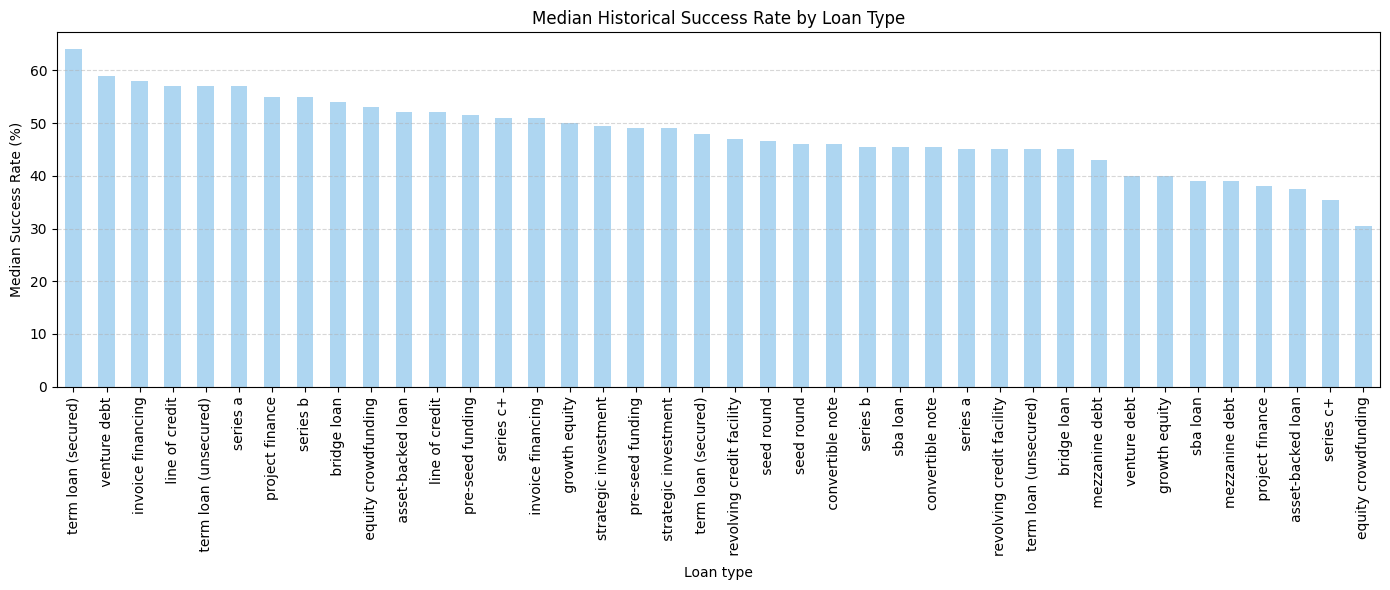

In [31]:
# Group and compute median
df_lender_analysis['preferred_loan_types_list'] = df_lender_analysis['preferred_loan_types'].str.split(';')
exploded = df_lender_analysis.explode('preferred_loan_types_list')
median_success = exploded.groupby('preferred_loan_types_list')['historical_success_rate_pct'].median().sort_values(ascending=False)

plot_bar_graph(median_success, 
               title='Median Historical Success Rate by Loan Type', 
               column_name='loan_type',
               figsize=(14, 6),
               rotation=90)

#### Conclusion

1. Characteristics of successfully funded RFPs (e.g., common industries, deal sizes, regions, loan types).
    - Industry Sector – Strong differences in success rates between sectors (e.g., 90% vs. 50%).
    - Region – Global RFPs are far more likely to be funded than regional ones.
    - Loan Type Requested – Some types (like SBA loans) have notably lower success.
    - Deal Size – Funding probability decreases as deal size increases, except for very large deals (above $108K) which are always funded.
    - Applications Received – More applications strongly correlate with success, though not usable as an input feature.
- Low importance: Company Stage, Company Age at Request, Company Revenue, Purpose of Funds

2. Profiles of active and successful lenders.
    - Lender Type: 
        - Venture capital, corporate venture capital, and specialty finance
    - Risk Appetite: 
        - Medium-high or high
    - Preferred Region: 
        - APAC or North America
    - Preferred Industry: 
        - Lenders focusing on SaaS, hospitality & tourism, and healthcare
    - Preferred Loan Type: 
        - secured term loans, venture debt, and invoice financing

3. The relationship between lender preferences and RFP funding outcomes.
    - Lenders prioritize RFPs that fall within their declared interest areas — i.e., their “preference strike zone” — making preference alignment a valuable feature for recommendation or funding prediction models.
    - We can clearly see this in industry, region, and loan type 
    - The same preference appear in rfp deal sizes within the lender’s preferred strike zone

## Data preparation - Manual solutions

RFPs
- Important
    - deal_size_usd → Normalize (Will be used) [Binarize is also an option]
    - industry_sector → One-hot encode (Will be used)
    - region → One-hot encode. (Will be used)
    - loan_type_requested → One-hot encode. (Will be used)
- Not so important
    - company_age -> submission_year - founding_year (Will be used)
    - company_revenue_last_fy_usd → Normalize (Will be used) [Binarize is also an option]
    - company_stage → One-hot encode (Will not be used -> Deprioritized by low relevance and dimensionality)
    - purpose_of_funds → One-hot encode (Will not be used -> Deprioritized by low relevance and dimensionality)
LENDERS (**Small dataset, with so many hot-encoded features can lead to a dimensionality problem)
- Important
    - lender_type → One-hot encode (Will be used)
    - risk_appetite → one-hot encode (Will be used)
    - preferred_industries → Multi-hot encode (Will be used)
    - preferred_regions → Multi-hot encode (Will be used)
    - preferred_loan_types → Multi-hot encode (Will be used)
- Not so important
    - preferred_deal_size_min_usd → Normalize (Will not be used -> Deprioritized by low relevance) [Binarize is also an option]
    - preferred_deal_size_max_usd → Normalize (Will not be used -> Deprioritized by low relevance) [Binarize is also an option]
    - deal_size_range → Normalize (Will not be used -> Deprioritized by low relevance) [Binarize is also an option]

In [32]:
from preprocessing import preprocess_rfp_features, preprocess_lenders_features, preprocess_preference_alignment_flags

df_rfp_lender = df_cleaned_historical_rfps[['rfp_id', 'awarded_lender_id']]

#### Prepare RFPs dataset

In [33]:
df_prep_historical_rfps = preprocess_rfp_features(df_cleaned_historical_rfps)
display(df_prep_historical_rfps.head())
df_prep_historical_rfps.info()

,funded_flag,deal_size_usd,company_revenue_last_fy_usd,company_age,industry_sector_aerospace & defense,industry_sector_agriculture & agtech,industry_sector_ai & machine learning,industry_sector_automotive,industry_sector_biotechnology,industry_sector_construction & infrastructure,...,loan_type_requested_revolving credit facility,loan_type_requested_sba loan,loan_type_requested_seed round,loan_type_requested_series a,loan_type_requested_series b,loan_type_requested_series c+,loan_type_requested_strategic investment,loan_type_requested_term loan (secured),loan_type_requested_term loan (unsecured),loan_type_requested_venture debt
rfp_id,,,,,,,,,,,,,,,,,,,,,
rfp00001,1,0.259785,0.008415,0.277778,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
rfp00002,1,0.004176,0.000000,0.833333,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
rfp00003,1,0.004015,0.009400,0.222222,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
rfp00004,1,0.010556,0.000000,0.583333,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
rfp00005,1,0.007427,0.293049,0.055556,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, rfp00001 to rfp20000
Data columns (total 55 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   funded_flag                                    20000 non-null  int64  
 1   deal_size_usd                                  20000 non-null  float64
 2   company_revenue_last_fy_usd                    20000 non-null  float64
 3   company_age                                    20000 non-null  float64
 4   industry_sector_aerospace & defense            20000 non-null  bool   
 5   industry_sector_agriculture & agtech           20000 non-null  bool   
 6   industry_sector_ai & machine learning          20000 non-null  bool   
 7   industry_sector_automotive                     20000 non-null  bool   
 8   industry_sector_biotechnology                  20000 non-null  bool   
 9   industry_sector_construction & infrastructure

#### Prepare Lenders dataset

In [34]:
df_prep_lender_preferences = preprocess_lenders_features(df_cleaned_lender_preferences)
display(df_prep_lender_preferences.head())
df_prep_lender_preferences.info()

,lender_type_angel investor group,lender_type_commercial bank,lender_type_corporate venture capital,lender_type_credit union,lender_type_development finance institution,lender_type_impact investor,lender_type_investment fund,lender_type_mezzanine fund,lender_type_peer-to-peer lender,lender_type_private equity,...,preferred_loan_types_revolving credit facility,preferred_loan_types_sba loan,preferred_loan_types_seed round,preferred_loan_types_series a,preferred_loan_types_series b,preferred_loan_types_series c+,preferred_loan_types_strategic investment,preferred_loan_types_term loan (secured),preferred_loan_types_term loan (unsecured),preferred_loan_types_venture debt
lender_id,,,,,,,,,,,,,,,,,,,,,
ldr0001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
ldr0002,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
ldr0003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
ldr0004,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
ldr0005,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, ldr0001 to ldr0200
Data columns (total 71 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   lender_type_angel investor group                      200 non-null    bool 
 1   lender_type_commercial bank                           200 non-null    bool 
 2   lender_type_corporate venture capital                 200 non-null    bool 
 3   lender_type_credit union                              200 non-null    bool 
 4   lender_type_development finance institution           200 non-null    bool 
 5   lender_type_impact investor                           200 non-null    bool 
 6   lender_type_investment fund                           200 non-null    bool 
 7   lender_type_mezzanine fund                            200 non-null    bool 
 8   lender_type_peer-to-peer lender                       200 non-null    bool 

#### Alignment - lenders preferences with RFPs

In [35]:
df_merged_rfps_lenders = pd.merge(
    df_cleaned_historical_rfps,
    df_cleaned_lender_preferences,
    left_on='awarded_lender_id',
    right_on='lender_id',
    how='left'
)

df_prep_alignment = preprocess_preference_alignment_flags(df_merged_rfps_lenders)
df_prep_alignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rfp_id              20000 non-null  object
 1   lender_id           14039 non-null  object
 2   funded_flag         20000 non-null  int64 
 3   region_match        20000 non-null  bool  
 4   industry_match      20000 non-null  bool  
 5   loan_type_match     20000 non-null  bool  
 6   deal_size_in_range  20000 non-null  bool  
dtypes: bool(4), int64(1), object(2)
memory usage: 547.0+ KB


# Solutions

## Manual Solution 1 - Recommend lenders based on similar funded rfps [Content based]

Given an RFP -> Search for other similars RFPs usin cosine_similarity -> Get the lenders that funded this RFPs -> Sort the lenders based on preferences matches with the given RFP -> return the recommended lenders sorted

In [36]:
from preprocessing import match_preference, is_deal_size_in_range
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
def get_top_n_similar_rfps(
    rfp_id, 
    X, 
    top_n=5, 
    df_keys=None, 
    ensure_lender=False, 
    method='cosine_similarity'
):
    if method != 'cosine_similarity':
        raise NotImplementedError("Only cosine_similarity is currently supported.")
    
    if rfp_id not in X.index:
        raise ValueError(f"RFP ID '{rfp_id}' not found in the dataset.")

    # Compute similarity
    similarity_matrix = cosine_similarity(X)
    similarity_df = pd.DataFrame(similarity_matrix, index=X.index, columns=X.index)
    similarities = similarity_df.loc[rfp_id].drop(rfp_id).sort_values(ascending=False)

    # If not filtering by lender, return top_n directly
    if not ensure_lender or df_keys is None:
        return similarities.head(top_n)

    # Keep only the first RFP per unique awarded_lender_id
    df_sim = similarities.reset_index()
    df_sim.columns = ['rfp_id', 'similarity']
    df_sim = df_sim.merge(df_keys[['rfp_id', 'awarded_lender_id']], on='rfp_id', how='left')
    df_sim = df_sim[df_sim['awarded_lender_id'].notna()]
    df_unique = df_sim.drop_duplicates(subset='awarded_lender_id', keep='first')

    # Return top_n most similar
    return df_unique.set_index('rfp_id')['similarity'].head(top_n)


In [38]:
def sort_suggested_lenders_to_rfp(rfp_row, awarded_lenders_ids, df_cleaned_lender_preferences):
    # Filter suggested lenders
    df_suggested_lenders = df_cleaned_lender_preferences[df_cleaned_lender_preferences['lender_id'].isin(awarded_lenders_ids)].copy()

    # Calculate matches (Region > deal_size > loan_type > industry_sector)
    df_suggested_lenders['region_match'] = df_suggested_lenders.apply(
        lambda row: match_preference(row['preferred_regions'], rfp_row['region']), axis=1)
    df_suggested_lenders['deal_size_in_range'] = df_suggested_lenders.apply(
        lambda row: is_deal_size_in_range(rfp_row['deal_size_usd'], row['preferred_deal_size_min_usd'], row['preferred_deal_size_max_usd']), axis=1)
    df_suggested_lenders['loan_type_match'] = df_suggested_lenders.apply(
        lambda row: match_preference(row['preferred_loan_types'], rfp_row['loan_type_requested']), axis=1)
    df_suggested_lenders['industry_match'] = df_suggested_lenders.apply(
        lambda row: match_preference(row['preferred_industries'], rfp_row['industry_sector']), axis=1)
    df_suggested_lenders['total_matches'] = (
        df_suggested_lenders['region_match'].astype(int) +
        df_suggested_lenders['deal_size_in_range'].astype(int) +
        df_suggested_lenders['loan_type_match'].astype(int) +
        df_suggested_lenders['industry_match'].astype(int)
    )

    # Create a tuple key for sorting based on priority (region > industry > loan_type > deal_size)
    df_suggested_lenders['sort_key'] = df_suggested_lenders.apply(
        lambda row: (
            row['total_matches'],
            int(row['region_match']), 
            int(row['deal_size_in_range']),
            int(row['loan_type_match']), 
            int(row['industry_match']) 
        ), axis=1
    )

    # Return sorted suggested lenders by number of matches and matches priority
    return df_suggested_lenders.sort_values(by='sort_key', ascending=False).drop(columns='sort_key')

In [39]:
def get_suggested_lenders_to_rfp(rfp_row, similar_rfps_list, df_rfp_lender, df_cleaned_lender_preferences):
    # Filter suggested lenders
    awarded_lenders_ids = df_rfp_lender[df_rfp_lender['rfp_id'].isin(similar_rfps_list)]['awarded_lender_id'].to_list()
    df_suggested_lenders = df_cleaned_lender_preferences[df_cleaned_lender_preferences['lender_id'].isin(awarded_lenders_ids)].copy()

    df_suggested_lenders = sort_suggested_lenders_to_rfp(rfp_row, 
                                  awarded_lenders_ids, 
                                  df_cleaned_lender_preferences)
    
    return df_suggested_lenders

In [40]:
rfp_id = 'rfp00002'
rfp_row = df_cleaned_historical_rfps[df_cleaned_historical_rfps['rfp_id'] == rfp_id].iloc[0]

# Get similar rfps with lenders
similar_rfps = get_top_n_similar_rfps(
    rfp_id, 
    df_prep_historical_rfps, 
    top_n=10, 
    df_keys=df_rfp_lender,
    ensure_lender=True,
    method='cosine_similarity')

df_suggested_lenders = get_suggested_lenders_to_rfp(rfp_row, 
                                                    similar_rfps.index, 
                                                    df_rfp_lender, 
                                                    df_cleaned_lender_preferences)

df_suggested_lenders

,lender_id,lender_type,preferred_deal_size_min_usd,preferred_deal_size_max_usd,preferred_industries,preferred_regions,preferred_loan_types,risk_appetite,historical_success_rate_pct,deal_size_range,preferred_region_list,preferred_industries_list,preferred_loan_types_list,region_match,deal_size_in_range,loan_type_match,industry_match,total_matches
102,ldr0103,mezzanine fund,500000,1396848,finance; consumer goods; media & entertainment...,global,convertible note; seed round; line of credit; ...,medium-low,58.0,896848,[global],"[finance, consumer goods, media & entertainm...","[convertible note, seed round, line of credi...",True,True,True,True,4
5,ldr0006,venture capital,500000,4062941,ai & machine learning; education; healthcare,global,seed round; term loan (secured); pre-seed fund...,medium-low,70.0,3562941,[global],"[ai & machine learning, education, healthcare]","[seed round, term loan (secured), pre-seed f...",True,True,True,False,3
88,ldr0089,peer-to-peer lender,100000,952577,biotechnology,global,pre-seed funding; seed round; series a; revolv...,low,14.0,852577,[global],[biotechnology],"[pre-seed funding, seed round, series a, re...",True,True,True,False,3
128,ldr0129,angel investor group,100000,1343768,technology; consumer goods; deep tech; profess...,global,seed round; venture debt; term loan (unsecured),high,63.0,1243768,[global],"[technology, consumer goods, deep tech, pro...","[seed round, venture debt, term loan (unsecu...",True,True,True,False,3
132,ldr0133,mezzanine fund,100000,790555,construction & infrastructure; education; heal...,global,convertible note; revolving credit facility; s...,low,26.0,690555,[global],"[construction & infrastructure, education, h...","[convertible note, revolving credit facility,...",True,True,True,False,3
67,ldr0068,specialty finance company,500000,2030296,gaming; hospitality & tourism; renewable energ...,global,revolving credit facility,medium-low,63.0,1530296,[global],"[gaming, hospitality & tourism, renewable en...",[revolving credit facility],True,True,False,True,3
138,ldr0139,development finance institution,100000,448284,e-commerce; biotechnology; manufacturing; gaming,global,invoice financing; asset-backed loan; bridge l...,medium-low,52.0,348284,[global],"[e-commerce, biotechnology, manufacturing, ...","[invoice financing, asset-backed loan, bridg...",True,False,True,False,2
189,ldr0190,corporate venture capital,100000,486307,technology,global,pre-seed funding; mezzanine debt; term loan (s...,medium,26.0,386307,[global],[technology],"[pre-seed funding, mezzanine debt, term loan...",True,False,True,False,2
10,ldr0011,commercial bank,1000000,4732660,manufacturing; media & entertainment; deep tec...,global,invoice financing; bridge loan; line of credit...,low,58.0,3732660,[global],"[manufacturing, media & entertainment, deep ...","[invoice financing, bridge loan, line of cre...",True,False,False,True,2
112,ldr0113,development finance institution,100000,252413,automotive,"north america; emea (europe, middle east, africa)",asset-backed loan; invoice financing; growth e...,venture,57.0,152413,"[north america, emea (europe, middle east, af...",[automotive],"[asset-backed loan, invoice financing, growt...",False,False,False,False,0


## Manual Solution 2 - Recommend lenders based on similar lenders that funded similar rfps [Content based - Combined]

Given an RFP -> Get the lender that funded this RFP -> If not funded, Search for the most similars RFP that was funded by a lender (using cosine_similarity) -> Search for similar lenders (Also using cosin similarity) -> Sort the lenders based on preferences matches with the given RFP -> return the recommended lenders sorted

In [41]:
def get_top_n_similar_lenders(
    lender_id,
    X_lenders,
    top_n=5,
    method='cosine_similarity'
):
    if method != 'cosine_similarity':
        raise NotImplementedError("Only cosine_similarity is currently supported.")

    if lender_id not in X_lenders.index:
        raise ValueError(f"Lender ID '{lender_id}' not found in the dataset.")

    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(X_lenders)
    similarity_df = pd.DataFrame(similarity_matrix, index=X_lenders.index, columns=X_lenders.index)

    # Get top-N most similar lenders, excluding itself
    similarities = similarity_df.loc[lender_id].drop(lender_id).sort_values(ascending=False)

    return similarities.head(top_n)

In [42]:
rfp_id = 'rfp00002'
# rfp_id = 'rfp00010'

# Get recommendations based on lenders similarities (Use the awarded_lender of the most similar rfp if the given rfp has no awarded_lender)
rfp_row = df_cleaned_historical_rfps[df_cleaned_historical_rfps['rfp_id'] == rfp_id].iloc[0]
lender_id = rfp_row['awarded_lender_id']
if lender_id is None:
    similar_rfps = get_top_n_similar_rfps(
        rfp_id, 
        df_prep_historical_rfps, 
        top_n=1, 
        df_keys=df_rfp_lender,
        ensure_lender=True,
        method='cosine_similarity')
    rfp_id = similar_rfps.index[0]
    rfp_row = df_cleaned_historical_rfps[df_cleaned_historical_rfps['rfp_id'] == rfp_id].iloc[0]
    lender_id = rfp_row['awarded_lender_id']

similar_lenders = get_top_n_similar_lenders(
    lender_id,
    df_prep_lender_preferences,
    top_n=10
)

df_suggested_lenders = sort_suggested_lenders_to_rfp(rfp_row, 
                              similar_lenders.index, 
                              df_cleaned_lender_preferences)

df_suggested_lenders

,lender_id,lender_type,preferred_deal_size_min_usd,preferred_deal_size_max_usd,preferred_industries,preferred_regions,preferred_loan_types,risk_appetite,historical_success_rate_pct,deal_size_range,preferred_region_list,preferred_industries_list,preferred_loan_types_list,region_match,deal_size_in_range,loan_type_match,industry_match,total_matches
183,ldr0184,mezzanine fund,100000,762909,real estate; finance; logistics & supply chain...,global,seed round; term loan (secured),medium-low,22.0,662909,[global],"[real estate, finance, logistics & supply ch...","[seed round, term loan (secured)]",True,True,True,False,3
55,ldr0056,specialty finance company,500000,1509465,consumer goods; retail; media & entertainment,global,series a; convertible note; project finance,medium-low,35.0,1009465,[global],"[consumer goods, retail, media & entertainment]","[series a, convertible note, project finance]",True,True,False,True,3
67,ldr0068,specialty finance company,500000,2030296,gaming; hospitality & tourism; renewable energ...,global,revolving credit facility,medium-low,63.0,1530296,[global],"[gaming, hospitality & tourism, renewable en...",[revolving credit facility],True,True,False,True,3
80,ldr0081,mezzanine fund,5000000,27375443,education; healthcare; media & entertainment,global,series b; venture debt; seed round; revolving ...,low,66.0,22375443,[global],"[education, healthcare, media & entertainment]","[series b, venture debt, seed round, revolv...",True,False,True,True,3
43,ldr0044,peer-to-peer lender,1000000,7264822,renewable energy; automotive,global,invoice financing; seed round,venture,22.0,6264822,[global],"[renewable energy, automotive]","[invoice financing, seed round]",True,False,True,False,2
10,ldr0011,commercial bank,1000000,4732660,manufacturing; media & entertainment; deep tec...,global,invoice financing; bridge loan; line of credit...,low,58.0,3732660,[global],"[manufacturing, media & entertainment, deep ...","[invoice financing, bridge loan, line of cre...",True,False,False,True,2
64,ldr0065,mezzanine fund,100000,554240,construction & infrastructure; media & enterta...,global,project finance; mezzanine debt; convertible n...,venture,14.0,454240,[global],"[construction & infrastructure, media & enter...","[project finance, mezzanine debt, convertibl...",True,False,False,True,2
153,ldr0154,mezzanine fund,100000,489758,healthtech; finance; agriculture & agtech; aer...,global,strategic investment; convertible note; line o...,calculated growth,39.0,389758,[global],"[healthtech, finance, agriculture & agtech, ...","[strategic investment, convertible note, lin...",True,False,False,False,1
131,ldr0132,mezzanine fund,100000,303901,aerospace & defense; agriculture & agtech,"north america; emea (europe, middle east, africa)",convertible note; seed round,medium-low,48.0,203901,"[north america, emea (europe, middle east, af...","[aerospace & defense, agriculture & agtech]","[convertible note, seed round]",False,False,True,False,1
191,ldr0192,mezzanine fund,1000000,9345646,consumer goods,north america; apac (asia-pacific),sba loan; series c+; line of credit; project f...,medium-low,26.0,8345646,"[north america, apac (asia-pacific)]",[consumer goods],"[sba loan, series c+, line of credit, proje...",False,False,False,False,0


## AWS personalize

In [43]:
raise Exception("Stopping here to not run Personalize")

Exception: Stopping here to not run Personalize

Initial solution:
- Solution: RFPs as Users, Lenders as Items → Recommend Lender to RFP
- Recipe: Sims -> SIMS (content-based on item similarity), based on items (lenders) similarities
- Error: Each RFP has only one interaction (one funded lender) → not enough user data
    
Potential solution
- Solution: Invert roles → Lenders as Users, RFPs as Items (Lenders can fund more than one RFP)
- Recipe: User Personalization (collaborative filtering)
- Problem: Now we would be recommending RFPs that a lender (user) might like — not lenders for an RFP.
- Workaround: Use recommended RFPs to retrieve associated lenders or similar lenders (hybrid solution)

#### Set clients and vars

In [ ]:
import boto3
import time
import uuid
from aws_helper import (upload_csv_to_s3, wait_for_dataset_to_be_ready, 
                        wait_for_solution_version,wait_for_solution)

# Constants
bucket_name = 'recommendation-challenge'
prefix = 'v3'
personalize_dataset_group_name = f'{prefix}-rfp-lender-matching-dg'

interactions_file_name = 'interactions_v1.csv'
interactions_file_path = os.path.join(config.DATA_PATH_RESULTS, interactions_file_name)
users_file_name = 'users_v1.csv'
users_file_path = os.path.join(config.DATA_PATH_RESULTS, users_file_name)
items_file_name = 'items_v1.csv'
items_file_path = os.path.join(config.DATA_PATH_RESULTS, items_file_name)

### Initiallization

In [ ]:
# Initialize Personalize client
personalize = boto3.client('personalize')
personalize_events = boto3.client('personalize-events')

### Prepare data

In [ ]:
df_prep_personalize_rfps = df_cleaned_historical_rfps.copy()
df_prep_personalize_lender = df_cleaned_lender_preferences.copy()

interactions

In [ ]:
# Interactions
interactions_df = df_prep_personalize_rfps[
    df_prep_personalize_rfps['deal_status'].str.lower() == 'funded'
].copy()

interactions_df['user_id'] = interactions_df['rfp_id']
interactions_df['item_id'] = interactions_df['awarded_lender_id']
# Conversion to Unix timestamp
interactions_df['timestamp'] = pd.to_datetime(interactions_df['funding_date']).astype(int) // 10**9

interactions_df = interactions_df[['user_id', 'item_id', 'timestamp']]

# Define schema
schema_interactions = personalize.create_schema(
    name=f"interactions-schema-{prefix}",
    schema='''{
        "type": "record",
        "name": "Interactions",
        "namespace": "com.amazonaws.personalize.schema",
        "fields": [
            {"name": "USER_ID", "type": "string"},
            {"name": "ITEM_ID", "type": "string"},
            {"name": "TIMESTAMP", "type": "long"}
        ],
        "version": "1.0"
    }'''
)
schema_interactions_arn = schema_interactions['schemaArn']

Users

In [ ]:
# # Users
# users_df = df_prep_personalize_rfps.copy()
# users_df = users_df.rename(columns={
#     'rfp_id': 'user_id'
# })

# users_df = users_df[['user_id', 'company_stage', 'company_founding_year', 
#                      'company_revenue_last_fy_usd', 'deal_size_usd', 'industry_sector', 'region', 
#                      'loan_type_requested', 'purpose_of_funds']]

# # Define schema
# schema_users = personalize.create_schema(
#     name=f"users-schema",
#     schema='''{
#         "type": "record",
#         "name": "Users",
#         "namespace": "com.amazonaws.personalize.schema",
#         "fields": [
#             {"name": "USER_ID", "type": "string"},
#             {"name": "company_stage", "type": "string"},
#             {"name": "company_founding_year", "type": "float"},
#             {"name": "company_revenue_last_fy_usd", "type": "float"},
#             {"name": "deal_size_usd", "type": "float"},
#             {"name": "industry_sector", "type": "string"},
#             {"name": "region", "type": "string"},
#             {"name": "loan_type_requested", "type": "string"},
#             {"name": "purpose_of_funds", "type": "string"}
#         ],
#         "version": "1.0"
#     }'''
# )
# schema_users_arn = schema_users['schemaArn']

Items

In [ ]:
# Items
items_df = df_prep_personalize_lender.rename(columns={
    'lender_id': 'item_id'
})

items_df = items_df[['item_id', 'lender_type', 'preferred_deal_size_min_usd', 'preferred_deal_size_max_usd', 'preferred_industries', 
                     'preferred_regions', 'preferred_loan_types', 'risk_appetite', 'historical_success_rate_pct']]

# Define schema
schema_items = personalize.create_schema(
    name=f"items-schema-{prefix}",
    schema='''{
        "type": "record",
        "name": "Items",
        "namespace": "com.amazonaws.personalize.schema",
        "fields": [
            {"name": "ITEM_ID", "type": "string"},
            {"name": "lender_type", "type": "string"},
            {"name": "preferred_deal_size_min_usd", "type": "float"},
            {"name": "preferred_deal_size_max_usd", "type": "float"},
            {"name": "preferred_industries", "type": "string"},
            {"name": "preferred_regions", "type": "string"},
            {"name": "preferred_loan_types", "type": "string"},
            {"name": "risk_appetite", "type": "string"},
            {"name": "historical_success_rate_pct", "type": "float"}
        ],
        "version": "1.0"
    }'''
)
schema_items_arn = schema_items['schemaArn']

send data to s3

In [ ]:
# Save dataframes
# interactions_df.to_csv(interactions_file_path, index=False)
# # users_df.to_csv(users_file_path, index=False)
# items_df.to_csv(items_file_path, index=False)

In [ ]:
# # Send data to s3
# upload_csv_to_s3(file_path=interactions_file_path, bucket_name=bucket_name)
# # upload_csv_to_s3(file_path=users_file_path, bucket_name=bucket_name)
# upload_csv_to_s3(file_path=items_file_path, bucket_name=bucket_name)

### Create datasets

In [ ]:
response = personalize.create_dataset_group(name=personalize_dataset_group_name)
dataset_group_arn = response['datasetGroupArn']
print("Creating Dataset Group...")

# Wait for ACTIVE
status = "CREATE PENDING"
while status != "ACTIVE":
    status = personalize.describe_dataset_group(datasetGroupArn=dataset_group_arn)["datasetGroup"]["status"]
    print("Status:", status)
    time.sleep(10)

# Create interactions dataset
print("Creating Interactions dataset...")
response = personalize.create_dataset(
    name=f"interactions-dataset-{prefix}",
    datasetType="Interactions",
    datasetGroupArn=dataset_group_arn,
    schemaArn=schema_interactions_arn
)
interactions_dataset_arn = response['datasetArn']
wait_for_dataset_to_be_ready(personalize, interactions_dataset_arn)
response = personalize.create_dataset_import_job(
    jobName=f"import-interactions-{prefix}",
    datasetArn=interactions_dataset_arn,
    dataSource={
        "dataLocation": f"s3://{bucket_name}/{interactions_file_name}"
    },
    roleArn=f"arn:aws:iam::{os.getenv('AWS_ACCOUNT_ID')}:role/PersonalizeRole"
)

# # Create users dataset
# print("Creating Users dataset...")
# response = personalize.create_dataset(
#     name="users-dataset",
#     datasetType="Users",
#     datasetGroupArn=dataset_group_arn,
#     schemaArn=schema_users_arn
# )
# users_dataset_arn = response['datasetArn']
# wait_for_dataset_to_be_ready(personalize, users_dataset_arn)
# response = personalize.create_dataset_import_job(
#     jobName="import-users",
#     datasetArn=users_dataset_arn,
#     dataSource={
#         "dataLocation": f"s3://{bucket_name}/{users_file_name}"
#     },
#     roleArn=f"arn:aws:iam::{os.getenv('AWS_ACCOUNT_ID')}:role/PersonalizeRole"
# )

# Create items dataset
print("Creating Items dataset...")
response = personalize.create_dataset(
    name=f"items-dataset-{prefix}",
    datasetType="Items",
    datasetGroupArn=dataset_group_arn,
    schemaArn=schema_items_arn
)
items_dataset_arn = response['datasetArn']
wait_for_dataset_to_be_ready(personalize, items_dataset_arn)
response = personalize.create_dataset_import_job(
    jobName=f"import-items-{prefix}",
    datasetArn=items_dataset_arn,
    dataSource={
        "dataLocation": f"s3://{bucket_name}/{items_file_name}"
    },
    roleArn=f"arn:aws:iam::{os.getenv('AWS_ACCOUNT_ID')}:role/PersonalizeRole"
)



Creating Dataset Group...
Status: CREATE PENDING
Status: CREATE PENDING
Status: CREATE PENDING
Status: ACTIVE
Creating Interactions dataset...
Current dataset status: CREATE PENDING
Current dataset status: CREATE PENDING
Current dataset status: ACTIVE
✅ Solution is ready. You can now create a campaign.
dataset_arn: arn:aws:personalize:us-east-1:992382850507:dataset/v3-rfp-lender-matching-dg/INTERACTIONS
Creating Items dataset...
Current dataset status: CREATE PENDING
Current dataset status: CREATE PENDING
Current dataset status: CREATE PENDING
Current dataset status: ACTIVE
✅ Solution is ready. You can now create a campaign.
dataset_arn: arn:aws:personalize:us-east-1:992382850507:dataset/v3-rfp-lender-matching-dg/ITEMS


### Create model

In [ ]:
# Similar Items approach
response = personalize.create_solution(
    name=f'rfp-similar-items-solution-{prefix}',
    datasetGroupArn=dataset_group_arn,
    recipeArn='arn:aws:personalize:::recipe/aws-similar-items'
)

sims_solution_arn = response['solutionArn']
wait_for_solution(personalize, sims_solution_arn)

Solution status: ACTIVE
✅ Solution is ready. You can now create a campaign.
solution_arn: arn:aws:personalize:us-east-1:992382850507:solution/rfp-similar-items-solution-v3


### Train model

In [ ]:
# Similar Items approach
response = personalize.create_solution_version(solutionArn=sims_solution_arn)
sims_solution_version_arn = response['solutionVersionArn']
print("Started SIMS Solution Version:", sims_solution_version_arn)
wait_for_solution_version(personalize, sims_solution_version_arn)
# # Create campaign
# response = personalize.create_campaign(
#     name='rfp-sims-campaign',
#     solutionVersionArn=sims_solution_version_arn,
#     minProvisionedTPS=1
# )
# sims_campaign_arn = response['campaignArn']
# print("SIMS Campaign Created:", sims_campaign_arn)

Started SIMS Solution Version: arn:aws:personalize:us-east-1:992382850507:solution/rfp-similar-items-solution-v3/7f60b76a
Status: CREATE PENDING
Status: CREATE IN_PROGRESS
Status: CREATE IN_PROGRESS
Status: CREATE IN_PROGRESS
Status: CREATE IN_PROGRESS
Status: CREATE FAILED
❌ Solution version creation failed.
Failure reason: Dataset has fewer than 25 users with at least 2 interactions each


In [ ]:
response = personalize.list_solution_versions(
    solutionArn='arn:aws:personalize:us-east-1:992382850507:solution/rfp-sims-solution'
)

for version in response['solutionVersions']:
    print(version['solutionVersionArn'], version['status'])

arn:aws:personalize:us-east-1:992382850507:solution/rfp-sims-solution/62145a2a CREATE FAILED
arn:aws:personalize:us-east-1:992382850507:solution/rfp-sims-solution/813cb85f CREATE FAILED
arn:aws:personalize:us-east-1:992382850507:solution/rfp-sims-solution/dcb3fc4b CREATE FAILED


### Get recommendations

In [ ]:
# personalize_runtime = boto3.client('personalize-runtime')

# def get_lender_recommendations(similar_rfp_id, campaign_arn, num_results=10):
#     """
#     Get similar lenders based on a similar RFP ID using a SIMS campaign.
#     """
#     try:
#         response = personalize_runtime.get_recommendations(
#             campaignArn=campaign_arn,
#             itemId=similar_rfp_id,
#             numResults=num_results
#         )
#         item_list = response.get('itemList', [])
#         print("SIMS fallback results:")
#         return [item['itemId'] for item in item_list]

#     except personalize_runtime.exceptions.ResourceNotFoundException:
#         print("Campaign not found. Check your ARN.")
#     except personalize_runtime.exceptions.InvalidInputException:
#         print("Invalid input. Make sure the item ID is correct and was in the training data.")
#     except Exception as e:
#         print(f"Unexpected error: {e}")

#     return []

# Strategies comparision

In [ ]:
from recommendation_solutions import similar_lenders_profile_recommendation, similar_rfp_profile_recommendation
top_n = 3 # Number of recommendations to score the mean
n_evaluation = 10 # If 0 run the evaluation for all IDs

# Import clean data
cleaned_rfp_file_path = os.path.join(config.DATA_PATH_WRANGLE, 'cleaned_historical_rfps.parquet')
df_cleaned_historical_rfps = pd.read_parquet(cleaned_rfp_file_path)
cleaned_lenders_file_path = os.path.join(config.DATA_PATH_WRANGLE, 'cleaned_lender_preferences.parquet')
df_cleaned_lender_preferences = pd.read_parquet(cleaned_lenders_file_path)

simple_score_rfp_profile = []
simple_score_lenders_profile = []
for idx, row in df_cleaned_historical_rfps.iterrows():
    print(row['rfp_id'])
    if 0 < idx < n_evaluation:
        break
    # score based on rfp simillarity
    df_suggested_lenders = similar_rfp_profile_recommendation(row['rfp_id'], df_cleaned_historical_rfps, df_cleaned_lender_preferences, top_n=top_n)
    simple_score_rfp_profile.append(
        df_suggested_lenders['total_matches'].mean())

    # score based on lenders simillarity
    df_suggested_lenders = similar_lenders_profile_recommendation(row['rfp_id'], df_cleaned_historical_rfps, df_cleaned_lender_preferences, top_n=top_n)
    simple_score_lenders_profile.append(
        df_suggested_lenders['total_matches'].mean())

In [ ]:
print('similar_rfp_profile_score (0-4):', 
      sum(simple_score_rfp_profile) / len(simple_score_rfp_profile))
print('similar_lenders_profile_score (0-4):', 
      sum(simple_score_lenders_profile) / len(simple_score_lenders_profile))

similar_rfp_profile_score (0-4): 1.7700000000000002
similar_lenders_profile_score (0-4): 1.4466666666666668


# Strategic Answers

### 1. Based on your analysis, what are the top 3-5 factors or characteristics that appear to correlate with an RFP being successfully funded?
- Industry Sector – Strong differences in success rates between sectors (e.g., 90% vs. 50%).
- Region – Global RFPs are far more likely to be funded than regional ones.
- Loan Type Requested – Some types (like SBA loans) have notably lower success.
- Deal Size – Funding probability decreases as deal size increases, except for very large deals (above $108K) which are always funded.
- Applications Received – More applications strongly correlate with success, though not usable as an input feature.
- Low importance: Company Stage, Company Age at Request, Company Revenue, Purpose of Funds

### 2. Why did you choose that particular approach and model? Weigh in potential alternatives.
- Content-Based Recommendation via Similar RFPs:
    - Cosine similarity between RFPs (Simple and efficient)
    - For a new RFP, similar funded RFPs were identified, and their awarded lenders recommended.
    - Transparency and full control over feature engineering, making it highly interpretable.

- Content-Based Recommendation via Similar Lenders:
    - Cosine similarity between lenders (Simple and efficient)
    - Get recommendations based on lenders similarities (Use the awarded_lender of the most similar rfp if the given rfp has no awarded_lender)
    - Faster since we have less lenders

- AWS Personalize – SIMS (Similar Items) Recipe (Not Implemented):
    - Used SIMS to recommend lenders based on similarity to those that funded similar RFPs.
    - **Should be** ideal for the dataset’s structure, where each RFP had only one lender interaction.
    - Leveraged AWS’s managed infrastructure for fast deployment and low operational complexity.

- Why these models:
    - The first 2 methods are simple and easy to implement, also, they provide the custom content-based method provided flexibility and interpretability -> especially useful for cold-start situations
    - SIMS offered scalability and infrastructure robustness, but we need to have more interactions to use. 


- Potential Alternatives:
    - Clustering + Nearest Neighbor Matching: I explored clustering lenders based on preferences to group similar profiles, but it was less effective for real-time recommendation.
    - Hybrid Models: Combining SIMS output with similarity-based scores could be a future direction to balance performance and explainability. 
        - Or combining both similarity models for a better match sorting

### 3. How would you improve this going forward? 
- Hybrid Models -> Robustness
- Set similarity thresholds to avoid irrelevant recommendations
- Advanced Feature Engineering (Text embedding for specialization_notes and fund purpose)
- Feedback Loop Integration: Incorporate post-recommendation outcomes (e.g., application results, time to funding)

### 4. How might the specialization_notes in the lender data be used to improve a matching algorithm? What are the challenges in using this field?
- Improvements:
    - Improved preference extraction (Can add priority and weight for some other feature e.g. industry sector, region,... )
        - Specializes, Favored, Keen interest ...
    - Can improve risk profiling with a deeper meaning (Not only a categorical risk apettite)
        - General risk appetite: Opportunistic
    - Create embeddings for semantic understanding
        - E.g., “invests in early-stage ventures” and “focus on seed-stage startups” would map close in vector space.
    - Can show some requirements to invest in a company
- Challenges
    - Unstructured Format (Need robust NLP processing)
    - Ambiguity by language
    - Contradiction with structured fields
    

